In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import Activation, Dropout
from keras.layers import LeakyReLU
from keras import initializers
from keras.datasets import mnist
from keras.optimizers import Adam, RMSprop, SGD
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [8]:
# defining the generator.
def generator():
    model = Sequential()
    model.add(Dense(256, input_dim=100, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    model.add(LeakyReLU(0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(0.2))
    model.add(Dense(1024))
    model.add(LeakyReLU(0.2))
    model.add(Dense(784, activation='tanh'))
    return model

    


In [9]:
# defining the discriminator
def discriminator():
    model = Sequential()
    #input_dim same as dim of last layer of generator
    model.add(Dense(1024, input_dim=784, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))
    model.add(Dense(512))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))
    model.add(Dense(256))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [10]:
# Feed the generated image into the discriminator.
# discriminator is not being updated in this step
def combine(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model


In [11]:
# load in the mnist data:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize to [-1, 1]
x_train = (x_train.astype(np.float32) - 127.5) / 127.5

# For the sake of time not working with the entire dataset
x_train = x_train[:10000]
y_train = x_train[:10000]

# Flattening the data.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

# compiling the full GAN:

opt = Adam(lr=0.0002, beta_1=0.5)

d = discriminator()
d.compile(loss='binary_crossentropy', optimizer=opt)

g = generator()
g.compile(loss='binary_crossentropy', optimizer=opt)

dg = combine(g, d)
dg.compile(loss='binary_crossentropy', optimizer=opt)


In [12]:
# defining a helper function to sample from the network
def disp_sample(g):
    noise = np.random.uniform(-1, 1, size=(batch_size, 100))
    generated_images = g.predict(noise, verbose=0)
    show_im = generated_images[0]
    show_im = (show_im + 1) / 2.0
    show_im = show_im.reshape(28, 28)
    plt.imshow(show_im, cmap='gray')
    plt.show()

Epoch #0


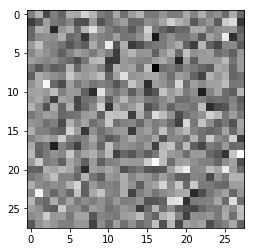

Number batches 78
0(0/78) D: 0.5802, G: 0.6892
0(1/78) D: 0.4024, G: 0.6758
0(2/78) D: 0.3769, G: 0.6611
0(3/78) D: 0.3840, G: 0.6457
0(4/78) D: 0.3991, G: 0.6267
0(5/78) D: 0.4106, G: 0.6153
0(6/78) D: 0.4202, G: 0.6158
0(7/78) D: 0.4255, G: 0.6339
0(8/78) D: 0.4223, G: 0.6672
0(9/78) D: 0.4077, G: 0.7097
0(10/78) D: 0.3991, G: 0.7541
0(11/78) D: 0.3871, G: 0.7746
0(12/78) D: 0.3922, G: 0.7848
0(13/78) D: 0.3972, G: 0.8079
0(14/78) D: 0.4072, G: 0.7708
0(15/78) D: 0.4331, G: 0.7932
0(16/78) D: 0.4451, G: 0.7251
0(17/78) D: 0.4489, G: 0.7846
0(18/78) D: 0.4404, G: 0.7843
0(19/78) D: 0.4361, G: 0.7900
0(20/78) D: 0.4334, G: 0.8624
0(21/78) D: 0.4225, G: 0.8499
0(22/78) D: 0.4182, G: 0.9721
0(23/78) D: 0.4147, G: 0.7790
0(24/78) D: 0.4635, G: 0.8895
0(25/78) D: 0.4233, G: 1.0085
0(26/78) D: 0.4577, G: 0.6034
0(27/78) D: 0.5626, G: 0.6379
0(28/78) D: 0.5123, G: 0.8659
0(29/78) D: 0.4068, G: 1.0857
0(30/78) D: 0.4396, G: 0.6601
0(31/78) D: 0.4941, G: 0.7554
0(32/78) D: 0.4404, G: 1.1009
0(

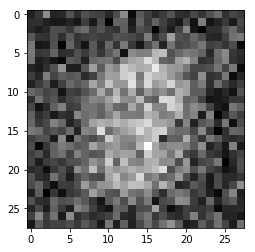

Number batches 78
1(0/78) D: 0.6033, G: 0.8968
1(1/78) D: 0.5277, G: 0.8129
1(2/78) D: 0.4900, G: 0.8947
1(3/78) D: 0.4419, G: 1.0555
1(4/78) D: 0.3842, G: 1.2117
1(5/78) D: 0.3389, G: 1.3236
1(6/78) D: 0.3303, G: 1.2116
1(7/78) D: 0.3644, G: 1.5380
1(8/78) D: 0.4388, G: 0.4494
1(9/78) D: 0.6774, G: 0.8359
1(10/78) D: 0.4021, G: 1.4777
1(11/78) D: 0.4795, G: 0.7201
1(12/78) D: 0.4770, G: 0.7857
1(13/78) D: 0.4365, G: 1.1259
1(14/78) D: 0.4019, G: 1.0352
1(15/78) D: 0.3439, G: 1.0418
1(16/78) D: 0.3386, G: 1.2502
1(17/78) D: 0.3335, G: 1.1592
1(18/78) D: 0.3423, G: 1.3923
1(19/78) D: 0.3465, G: 1.1012
1(20/78) D: 0.3780, G: 1.7512
1(21/78) D: 0.5347, G: 0.3811
1(22/78) D: 0.7130, G: 0.7176
1(23/78) D: 0.4172, G: 1.3503
1(24/78) D: 0.3216, G: 1.3310
1(25/78) D: 0.3165, G: 0.9695
1(26/78) D: 0.3691, G: 1.0629
1(27/78) D: 0.3620, G: 1.1999
1(28/78) D: 0.3931, G: 0.9623
1(29/78) D: 0.3751, G: 1.1126
1(30/78) D: 0.3218, G: 1.3070
1(31/78) D: 0.2614, G: 1.3979
1(32/78) D: 0.2399, G: 1.4977
1(

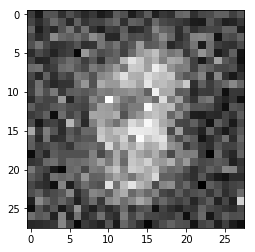

Number batches 78
2(0/78) D: 0.2333, G: 2.3026
2(1/78) D: 0.3702, G: 0.5578
2(2/78) D: 0.7313, G: 1.3594
2(3/78) D: 0.2577, G: 2.1133
2(4/78) D: 0.4119, G: 0.9997
2(5/78) D: 0.3362, G: 1.3172
2(6/78) D: 0.2255, G: 2.0288
2(7/78) D: 0.1768, G: 2.0528
2(8/78) D: 0.1830, G: 1.4307
2(9/78) D: 0.2753, G: 2.5622
2(10/78) D: 0.2917, G: 1.4159
2(11/78) D: 0.2651, G: 1.9076
2(12/78) D: 0.1881, G: 1.9208
2(13/78) D: 0.1704, G: 1.9071
2(14/78) D: 0.1696, G: 2.2380
2(15/78) D: 0.1231, G: 2.6127
2(16/78) D: 0.0956, G: 2.5564
2(17/78) D: 0.1213, G: 2.0377
2(18/78) D: 0.1976, G: 3.0325
2(19/78) D: 0.2098, G: 1.2654
2(20/78) D: 0.3646, G: 2.3841
2(21/78) D: 0.0802, G: 2.9142
2(22/78) D: 0.0761, G: 2.8156
2(23/78) D: 0.0947, G: 2.3078
2(24/78) D: 0.0907, G: 2.1387
2(25/78) D: 0.1035, G: 2.3281
2(26/78) D: 0.0961, G: 2.5407
2(27/78) D: 0.1146, G: 2.1072
2(28/78) D: 0.1243, G: 2.2047
2(29/78) D: 0.1247, G: 2.4866
2(30/78) D: 0.1256, G: 2.3660
2(31/78) D: 0.1078, G: 2.5098
2(32/78) D: 0.0949, G: 2.9234
2(

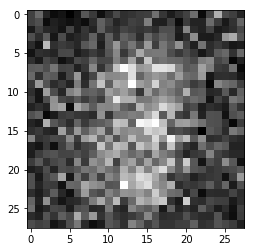

Number batches 78
3(0/78) D: 0.1100, G: 3.0782
3(1/78) D: 0.1240, G: 2.2806
3(2/78) D: 0.1642, G: 3.4068
3(3/78) D: 0.2330, G: 1.0759
3(4/78) D: 0.4557, G: 3.3848
3(5/78) D: 0.0963, G: 3.6304
3(6/78) D: 0.1102, G: 2.7091
3(7/78) D: 0.0804, G: 2.5689
3(8/78) D: 0.1081, G: 3.1880
3(9/78) D: 0.0794, G: 3.3187
3(10/78) D: 0.1121, G: 2.8695
3(11/78) D: 0.1580, G: 2.0146
3(12/78) D: 0.3155, G: 3.9180
3(13/78) D: 0.5060, G: 0.9146
3(14/78) D: 0.5701, G: 2.2578
3(15/78) D: 0.1981, G: 4.0786
3(16/78) D: 0.2167, G: 2.7731
3(17/78) D: 0.1293, G: 2.2985
3(18/78) D: 0.2025, G: 2.9424
3(19/78) D: 0.1602, G: 3.0220
3(20/78) D: 0.1950, G: 2.5516
3(21/78) D: 0.2256, G: 2.7311
3(22/78) D: 0.2310, G: 3.1561
3(23/78) D: 0.2410, G: 2.3699
3(24/78) D: 0.2619, G: 5.0917
3(25/78) D: 0.6838, G: 0.1224
3(26/78) D: 1.4562, G: 0.6012
3(27/78) D: 0.6073, G: 1.9309
3(28/78) D: 0.1550, G: 2.9497
3(29/78) D: 0.3415, G: 1.9771
3(30/78) D: 0.1600, G: 1.6077
3(31/78) D: 0.1944, G: 1.7030
3(32/78) D: 0.1703, G: 2.2256
3(

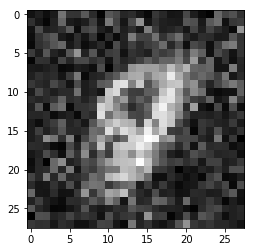

Number batches 78
4(0/78) D: 0.2096, G: 2.6902
4(1/78) D: 0.2330, G: 2.8792
4(2/78) D: 0.2471, G: 3.4787
4(3/78) D: 0.3080, G: 0.6447
4(4/78) D: 0.7260, G: 5.8497
4(5/78) D: 0.6738, G: 1.8041
4(6/78) D: 0.3336, G: 2.3357
4(7/78) D: 0.1482, G: 3.3941
4(8/78) D: 0.1408, G: 3.0350
4(9/78) D: 0.0905, G: 2.7383
4(10/78) D: 0.1271, G: 3.4073
4(11/78) D: 0.1945, G: 2.0058
4(12/78) D: 0.2758, G: 4.0139
4(13/78) D: 0.3044, G: 1.4463
4(14/78) D: 0.4324, G: 3.3440
4(15/78) D: 0.1526, G: 3.3467
4(16/78) D: 0.1692, G: 2.2697
4(17/78) D: 0.2141, G: 3.0245
4(18/78) D: 0.2192, G: 2.3310
4(19/78) D: 0.1974, G: 3.2077
4(20/78) D: 0.1303, G: 3.6126
4(21/78) D: 0.1494, G: 2.6586
4(22/78) D: 0.2495, G: 5.9532
4(23/78) D: 0.7080, G: 0.9831
4(24/78) D: 0.6050, G: 2.7056
4(25/78) D: 0.1118, G: 4.1751
4(26/78) D: 0.0760, G: 4.0750
4(27/78) D: 0.1288, G: 2.9496
4(28/78) D: 0.1277, G: 2.5621
4(29/78) D: 0.1977, G: 3.3468
4(30/78) D: 0.1619, G: 3.2697
4(31/78) D: 0.2223, G: 2.8819
4(32/78) D: 0.3495, G: 3.1575
4(

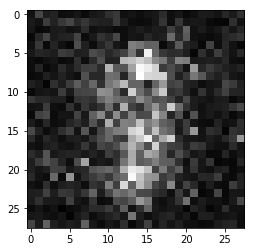

Number batches 78
5(0/78) D: 0.6255, G: 2.2778
5(1/78) D: 0.2331, G: 1.9970
5(2/78) D: 0.1942, G: 2.8441
5(3/78) D: 0.2261, G: 2.8055
5(4/78) D: 0.1586, G: 2.4474
5(5/78) D: 0.1732, G: 3.2465
5(6/78) D: 0.1561, G: 2.7652
5(7/78) D: 0.1671, G: 2.9556
5(8/78) D: 0.2817, G: 1.8087
5(9/78) D: 0.3360, G: 5.0341
5(10/78) D: 0.3996, G: 1.6897
5(11/78) D: 0.3435, G: 4.2936
5(12/78) D: 0.1989, G: 3.0460
5(13/78) D: 0.1397, G: 3.0298
5(14/78) D: 0.1514, G: 4.3546
5(15/78) D: 0.1393, G: 3.4078
5(16/78) D: 0.2176, G: 3.9409
5(17/78) D: 0.1811, G: 5.2786
5(18/78) D: 0.4309, G: 0.8987
5(19/78) D: 0.8494, G: 7.2988
5(20/78) D: 0.9135, G: 2.4457
5(21/78) D: 0.2124, G: 2.0613
5(22/78) D: 0.2107, G: 3.4790
5(23/78) D: 0.1040, G: 3.8657
5(24/78) D: 0.1149, G: 3.1942
5(25/78) D: 0.1500, G: 2.7734
5(26/78) D: 0.2017, G: 3.7053
5(27/78) D: 0.2990, G: 1.4188
5(28/78) D: 0.5457, G: 5.1598
5(29/78) D: 0.6003, G: 1.6837
5(30/78) D: 0.3168, G: 2.2379
5(31/78) D: 0.2129, G: 3.4074
5(32/78) D: 0.1953, G: 2.7370
5(

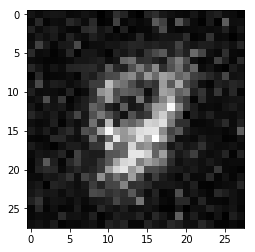

Number batches 78
6(0/78) D: 0.3349, G: 2.3302
6(1/78) D: 0.3114, G: 1.5723
6(2/78) D: 0.2786, G: 2.2574
6(3/78) D: 0.3124, G: 1.7160
6(4/78) D: 0.2931, G: 2.6199
6(5/78) D: 0.2779, G: 2.0094
6(6/78) D: 0.2674, G: 3.0906
6(7/78) D: 0.3154, G: 1.0488
6(8/78) D: 0.4369, G: 4.3931
6(9/78) D: 0.5411, G: 0.7394
6(10/78) D: 0.5300, G: 2.3160
6(11/78) D: 0.2587, G: 2.5605
6(12/78) D: 0.2822, G: 1.5377
6(13/78) D: 0.2841, G: 1.9472
6(14/78) D: 0.2470, G: 3.0045
6(15/78) D: 0.2565, G: 2.3178
6(16/78) D: 0.2214, G: 2.1665
6(17/78) D: 0.2512, G: 2.7277
6(18/78) D: 0.2634, G: 2.2853
6(19/78) D: 0.2668, G: 2.2529
6(20/78) D: 0.2546, G: 2.9319
6(21/78) D: 0.2354, G: 1.9112
6(22/78) D: 0.2887, G: 3.7395
6(23/78) D: 0.3729, G: 0.8049
6(24/78) D: 0.7847, G: 5.3152
6(25/78) D: 0.7894, G: 2.1496
6(26/78) D: 0.2106, G: 1.4183
6(27/78) D: 0.3010, G: 2.3669
6(28/78) D: 0.1717, G: 2.9242
6(29/78) D: 0.2009, G: 2.3408
6(30/78) D: 0.1831, G: 2.0190
6(31/78) D: 0.2050, G: 2.5383
6(32/78) D: 0.1796, G: 2.4679
6(

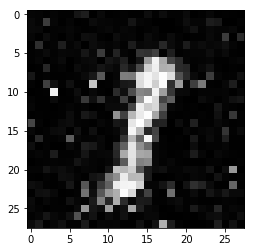

Number batches 78
7(0/78) D: 0.2569, G: 3.0608
7(1/78) D: 0.1960, G: 2.3054
7(2/78) D: 0.2013, G: 3.0934
7(3/78) D: 0.1973, G: 2.1222
7(4/78) D: 0.2262, G: 3.5476
7(5/78) D: 0.2373, G: 1.6676
7(6/78) D: 0.2684, G: 4.6623
7(7/78) D: 0.3127, G: 2.1300
7(8/78) D: 0.2660, G: 2.6444
7(9/78) D: 0.1554, G: 3.6640
7(10/78) D: 0.1502, G: 2.7530
7(11/78) D: 0.1526, G: 3.1742
7(12/78) D: 0.1514, G: 2.7482
7(13/78) D: 0.2177, G: 3.2166
7(14/78) D: 0.1659, G: 3.1779
7(15/78) D: 0.1607, G: 3.4244
7(16/78) D: 0.1866, G: 2.7420
7(17/78) D: 0.2384, G: 5.3450
7(18/78) D: 0.3581, G: 1.2840
7(19/78) D: 0.5412, G: 7.1717
7(20/78) D: 0.9419, G: 2.5892
7(21/78) D: 0.1812, G: 1.4335
7(22/78) D: 0.2651, G: 3.3139
7(23/78) D: 0.1152, G: 3.8382
7(24/78) D: 0.1491, G: 3.0911
7(25/78) D: 0.1513, G: 2.9466
7(26/78) D: 0.1090, G: 3.1279
7(27/78) D: 0.1074, G: 3.1742
7(28/78) D: 0.1475, G: 3.2331
7(29/78) D: 0.2030, G: 2.7732
7(30/78) D: 0.1488, G: 4.0108
7(31/78) D: 0.1719, G: 3.2233
7(32/78) D: 0.2074, G: 2.8123
7(

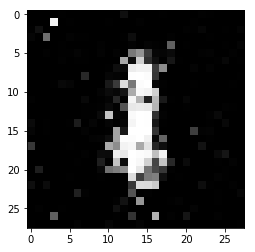

Number batches 78
8(0/78) D: 0.3273, G: 4.2452
8(1/78) D: 0.1965, G: 3.1797
8(2/78) D: 0.1774, G: 2.2009
8(3/78) D: 0.2461, G: 3.6746
8(4/78) D: 0.1793, G: 3.2936
8(5/78) D: 0.1867, G: 3.2837
8(6/78) D: 0.1280, G: 3.2771
8(7/78) D: 0.1545, G: 3.5924
8(8/78) D: 0.2161, G: 2.8809
8(9/78) D: 0.1847, G: 4.1837
8(10/78) D: 0.1498, G: 3.3666
8(11/78) D: 0.2181, G: 4.6386
8(12/78) D: 0.2426, G: 1.6598
8(13/78) D: 0.3542, G: 6.9513
8(14/78) D: 0.5575, G: 1.5249
8(15/78) D: 0.4218, G: 3.6806
8(16/78) D: 0.1165, G: 4.1683
8(17/78) D: 0.1295, G: 3.4836
8(18/78) D: 0.1193, G: 2.5753
8(19/78) D: 0.1114, G: 3.1631
8(20/78) D: 0.1521, G: 4.0285
8(21/78) D: 0.1361, G: 3.3532
8(22/78) D: 0.1449, G: 3.5950
8(23/78) D: 0.1632, G: 3.5778
8(24/78) D: 0.1656, G: 3.0232
8(25/78) D: 0.2043, G: 4.5705
8(26/78) D: 0.2239, G: 1.9949
8(27/78) D: 0.3458, G: 7.7194
8(28/78) D: 0.7421, G: 2.6406
8(29/78) D: 0.3373, G: 2.2901
8(30/78) D: 0.2203, G: 3.7025
8(31/78) D: 0.1119, G: 4.0297
8(32/78) D: 0.1592, G: 3.8566
8(

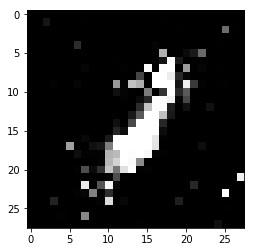

Number batches 78
9(0/78) D: 0.2521, G: 1.9388
9(1/78) D: 0.3645, G: 6.8017
9(2/78) D: 0.6440, G: 1.8631
9(3/78) D: 0.2974, G: 2.4237
9(4/78) D: 0.2044, G: 4.5059
9(5/78) D: 0.1417, G: 3.9150
9(6/78) D: 0.1205, G: 2.8202
9(7/78) D: 0.1576, G: 3.5408
9(8/78) D: 0.1841, G: 3.1602
9(9/78) D: 0.1369, G: 4.3041
9(10/78) D: 0.1921, G: 2.8281
9(11/78) D: 0.2228, G: 4.5848
9(12/78) D: 0.2131, G: 2.9751
9(13/78) D: 0.1767, G: 3.5211
9(14/78) D: 0.1710, G: 4.6135
9(15/78) D: 0.2338, G: 1.9782
9(16/78) D: 0.3145, G: 6.8375
9(17/78) D: 0.5009, G: 3.2424
9(18/78) D: 0.2659, G: 2.3030
9(19/78) D: 0.2373, G: 4.4307
9(20/78) D: 0.1813, G: 3.5877
9(21/78) D: 0.2048, G: 2.0651
9(22/78) D: 0.2893, G: 5.0261
9(23/78) D: 0.2316, G: 3.6013
9(24/78) D: 0.1777, G: 1.9236
9(25/78) D: 0.3221, G: 6.1176
9(26/78) D: 0.6012, G: 1.7140
9(27/78) D: 0.2843, G: 2.8364
9(28/78) D: 0.1464, G: 3.5015
9(29/78) D: 0.1165, G: 3.0188
9(30/78) D: 0.1682, G: 2.3954
9(31/78) D: 0.1464, G: 3.8827
9(32/78) D: 0.1509, G: 3.2373
9(

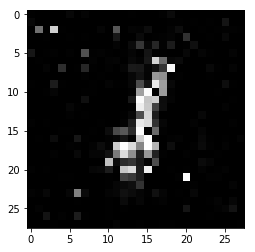

Number batches 78
10(0/78) D: 0.1886, G: 5.3837
10(1/78) D: 0.1917, G: 2.8800
10(2/78) D: 0.1494, G: 4.3736
10(3/78) D: 0.2001, G: 3.0345
10(4/78) D: 0.1468, G: 4.4515
10(5/78) D: 0.1819, G: 2.6155
10(6/78) D: 0.2648, G: 6.3103
10(7/78) D: 0.3740, G: 2.3771
10(8/78) D: 0.2811, G: 5.8534
10(9/78) D: 0.3927, G: 2.7876
10(10/78) D: 0.1626, G: 3.2316
10(11/78) D: 0.1450, G: 4.5204
10(12/78) D: 0.1334, G: 3.5706
10(13/78) D: 0.1331, G: 3.5814
10(14/78) D: 0.1815, G: 3.8966
10(15/78) D: 0.1775, G: 3.1419
10(16/78) D: 0.1866, G: 5.4238
10(17/78) D: 0.2776, G: 1.2287
10(18/78) D: 0.7379, G: 10.8947
10(19/78) D: 2.2039, G: 3.4983
10(20/78) D: 0.1782, G: 1.5200
10(21/78) D: 0.4408, G: 2.7594
10(22/78) D: 0.1712, G: 3.5449
10(23/78) D: 0.1389, G: 3.1942
10(24/78) D: 0.1344, G: 2.6561
10(25/78) D: 0.1417, G: 2.8766
10(26/78) D: 0.1391, G: 3.3230
10(27/78) D: 0.1456, G: 2.7631
10(28/78) D: 0.1559, G: 2.9977
10(29/78) D: 0.1841, G: 3.6954
10(30/78) D: 0.1934, G: 2.6972
10(31/78) D: 0.1873, G: 3.4184

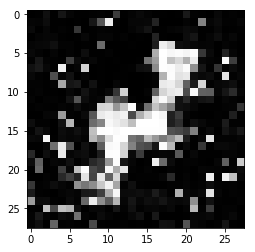

Number batches 78
11(0/78) D: 0.5686, G: 2.2689
11(1/78) D: 0.1612, G: 2.1517
11(2/78) D: 0.1815, G: 3.6773
11(3/78) D: 0.1591, G: 3.2215
11(4/78) D: 0.1268, G: 3.0811
11(5/78) D: 0.1339, G: 3.4503
11(6/78) D: 0.1550, G: 3.0794
11(7/78) D: 0.1498, G: 3.6842
11(8/78) D: 0.1718, G: 2.7022
11(9/78) D: 0.1891, G: 4.6150
11(10/78) D: 0.1467, G: 3.4680
11(11/78) D: 0.2855, G: 1.8462
11(12/78) D: 0.3442, G: 7.4439
11(13/78) D: 1.0147, G: 1.5005
11(14/78) D: 0.4645, G: 3.5937
11(15/78) D: 0.1021, G: 4.0400
11(16/78) D: 0.1594, G: 3.4388
11(17/78) D: 0.0992, G: 2.7273
11(18/78) D: 0.1809, G: 2.5407
11(19/78) D: 0.1499, G: 2.9138
11(20/78) D: 0.1012, G: 3.5604
11(21/78) D: 0.1253, G: 2.9708
11(22/78) D: 0.1250, G: 3.3070
11(23/78) D: 0.1129, G: 3.0818
11(24/78) D: 0.1786, G: 2.5890
11(25/78) D: 0.1862, G: 4.4497
11(26/78) D: 0.2102, G: 3.1088
11(27/78) D: 0.1932, G: 2.2519
11(28/78) D: 0.1953, G: 4.4725
11(29/78) D: 0.2857, G: 1.8238
11(30/78) D: 0.2964, G: 4.6108
11(31/78) D: 0.2435, G: 3.3786


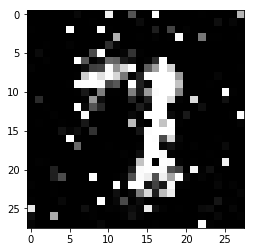

Number batches 78
12(0/78) D: 0.2268, G: 4.0572
12(1/78) D: 0.1777, G: 2.9102
12(2/78) D: 0.1571, G: 2.9415
12(3/78) D: 0.1403, G: 3.4776
12(4/78) D: 0.1048, G: 3.3059
12(5/78) D: 0.1474, G: 2.4971
12(6/78) D: 0.1719, G: 5.1863
12(7/78) D: 0.2129, G: 3.2714
12(8/78) D: 0.1357, G: 2.0393
12(9/78) D: 0.1874, G: 5.9625
12(10/78) D: 0.2502, G: 4.4360
12(11/78) D: 0.1196, G: 2.3673
12(12/78) D: 0.1971, G: 4.7782
12(13/78) D: 0.2083, G: 3.2193
12(14/78) D: 0.1440, G: 3.0398
12(15/78) D: 0.1277, G: 4.3677
12(16/78) D: 0.1278, G: 2.8827
12(17/78) D: 0.1039, G: 4.2542
12(18/78) D: 0.1046, G: 3.5078
12(19/78) D: 0.1230, G: 3.2368
12(20/78) D: 0.1199, G: 4.0174
12(21/78) D: 0.1573, G: 2.9364
12(22/78) D: 0.1226, G: 4.4304
12(23/78) D: 0.1557, G: 3.4302
12(24/78) D: 0.1404, G: 3.0698
12(25/78) D: 0.1272, G: 4.1614
12(26/78) D: 0.1223, G: 2.9339
12(27/78) D: 0.2024, G: 5.0563
12(28/78) D: 0.1641, G: 3.1939
12(29/78) D: 0.1620, G: 3.0360
12(30/78) D: 0.1417, G: 4.2675
12(31/78) D: 0.1463, G: 3.3182


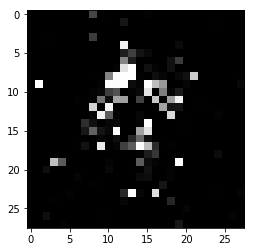

Number batches 78
13(0/78) D: 0.1498, G: 3.2000
13(1/78) D: 0.1571, G: 2.7855
13(2/78) D: 0.1305, G: 3.7525
13(3/78) D: 0.1521, G: 2.5108
13(4/78) D: 0.1266, G: 4.2308
13(5/78) D: 0.1280, G: 3.5683
13(6/78) D: 0.1042, G: 3.1201
13(7/78) D: 0.1001, G: 3.7903
13(8/78) D: 0.2287, G: 2.4818
13(9/78) D: 0.2080, G: 5.3845
13(10/78) D: 0.1691, G: 4.2404
13(11/78) D: 0.2089, G: 1.9313
13(12/78) D: 0.2112, G: 4.3620
13(13/78) D: 0.2173, G: 3.0138
13(14/78) D: 0.1414, G: 2.8733
13(15/78) D: 0.1374, G: 3.1152
13(16/78) D: 0.1682, G: 2.8418
13(17/78) D: 0.1128, G: 3.4546
13(18/78) D: 0.0916, G: 3.5918
13(19/78) D: 0.0911, G: 3.2111
13(20/78) D: 0.1534, G: 2.4809
13(21/78) D: 0.1354, G: 4.0928
13(22/78) D: 0.1571, G: 3.0422
13(23/78) D: 0.0952, G: 3.4251
13(24/78) D: 0.1035, G: 3.6483
13(25/78) D: 0.1252, G: 2.5523
13(26/78) D: 0.1641, G: 4.5263
13(27/78) D: 0.2237, G: 2.5228
13(28/78) D: 0.1738, G: 4.8514
13(29/78) D: 0.2583, G: 1.9495
13(30/78) D: 0.2458, G: 5.3423
13(31/78) D: 0.2127, G: 4.5690


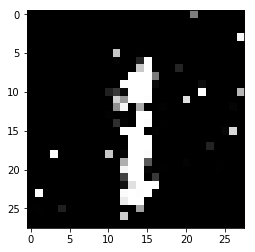

Number batches 78
14(0/78) D: 0.2061, G: 4.6527
14(1/78) D: 0.1930, G: 2.9104
14(2/78) D: 0.1452, G: 2.7775
14(3/78) D: 0.1515, G: 4.3325
14(4/78) D: 0.1760, G: 2.3833
14(5/78) D: 0.1972, G: 5.8134
14(6/78) D: 0.1709, G: 5.1237
14(7/78) D: 0.1572, G: 2.6148
14(8/78) D: 0.1501, G: 3.7810
14(9/78) D: 0.1339, G: 3.5166
14(10/78) D: 0.0992, G: 3.7090
14(11/78) D: 0.1194, G: 3.3660
14(12/78) D: 0.1383, G: 4.5560
14(13/78) D: 0.1482, G: 2.8954
14(14/78) D: 0.1559, G: 5.0543
14(15/78) D: 0.1828, G: 3.1212
14(16/78) D: 0.1374, G: 3.2587
14(17/78) D: 0.1130, G: 3.5755
14(18/78) D: 0.1715, G: 2.3733
14(19/78) D: 0.1809, G: 5.7605
14(20/78) D: 0.2190, G: 4.5164
14(21/78) D: 0.1485, G: 1.5443
14(22/78) D: 0.3448, G: 7.4180
14(23/78) D: 0.3919, G: 6.3386
14(24/78) D: 0.2673, G: 2.9467
14(25/78) D: 0.1279, G: 3.0893
14(26/78) D: 0.1273, G: 3.9597
14(27/78) D: 0.1038, G: 3.6497
14(28/78) D: 0.0959, G: 3.4921
14(29/78) D: 0.1043, G: 4.2229
14(30/78) D: 0.1040, G: 3.6662
14(31/78) D: 0.1024, G: 3.0249


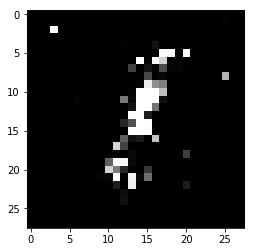

Number batches 78
15(0/78) D: 0.2012, G: 3.3376
15(1/78) D: 0.1054, G: 2.8083
15(2/78) D: 0.1303, G: 3.6600
15(3/78) D: 0.1323, G: 3.0067
15(4/78) D: 0.1145, G: 4.1687
15(5/78) D: 0.0766, G: 3.6921
15(6/78) D: 0.0665, G: 3.9893
15(7/78) D: 0.0933, G: 3.5070
15(8/78) D: 0.1144, G: 3.2765
15(9/78) D: 0.0893, G: 4.6710
15(10/78) D: 0.0951, G: 3.5503
15(11/78) D: 0.1037, G: 3.1595
15(12/78) D: 0.1388, G: 5.4287
15(13/78) D: 0.2220, G: 3.2548
15(14/78) D: 0.0935, G: 2.8854
15(15/78) D: 0.1157, G: 4.6237
15(16/78) D: 0.1458, G: 2.9604
15(17/78) D: 0.0907, G: 4.2187
15(18/78) D: 0.1062, G: 3.5916
15(19/78) D: 0.0971, G: 3.1397
15(20/78) D: 0.1216, G: 3.9056
15(21/78) D: 0.1268, G: 2.7556
15(22/78) D: 0.1115, G: 4.1832
15(23/78) D: 0.1215, G: 2.7881
15(24/78) D: 0.1226, G: 4.2938
15(25/78) D: 0.1426, G: 2.7420
15(26/78) D: 0.1314, G: 5.1615
15(27/78) D: 0.1597, G: 3.4938
15(28/78) D: 0.0853, G: 3.2412
15(29/78) D: 0.0915, G: 4.3189
15(30/78) D: 0.0990, G: 2.9443
15(31/78) D: 0.1185, G: 5.0583


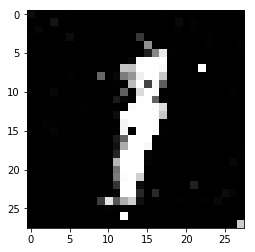

Number batches 78
16(0/78) D: 0.1944, G: 5.8045
16(1/78) D: 0.1795, G: 3.2416
16(2/78) D: 0.1409, G: 1.9785
16(3/78) D: 0.2424, G: 6.8282
16(4/78) D: 0.3845, G: 4.1648
16(5/78) D: 0.1191, G: 1.5787
16(6/78) D: 0.3059, G: 6.6321
16(7/78) D: 0.4064, G: 5.9854
16(8/78) D: 0.4521, G: 2.6767
16(9/78) D: 0.2288, G: 2.3534
16(10/78) D: 0.1558, G: 4.1045
16(11/78) D: 0.1675, G: 3.7595
16(12/78) D: 0.1767, G: 2.7841
16(13/78) D: 0.1813, G: 2.1691
16(14/78) D: 0.1694, G: 3.3689
16(15/78) D: 0.1372, G: 3.8183
16(16/78) D: 0.2224, G: 2.8559
16(17/78) D: 0.1412, G: 2.7135
16(18/78) D: 0.1294, G: 3.0841
16(19/78) D: 0.1051, G: 3.2311
16(20/78) D: 0.1723, G: 2.9037
16(21/78) D: 0.1553, G: 2.6916
16(22/78) D: 0.1580, G: 2.4324
16(23/78) D: 0.1403, G: 3.9107
16(24/78) D: 0.2014, G: 2.9062
16(25/78) D: 0.1197, G: 2.8151
16(26/78) D: 0.1587, G: 2.6822
16(27/78) D: 0.1527, G: 3.3491
16(28/78) D: 0.1179, G: 3.4446
16(29/78) D: 0.1331, G: 2.7239
16(30/78) D: 0.1432, G: 2.7230
16(31/78) D: 0.1067, G: 3.5207


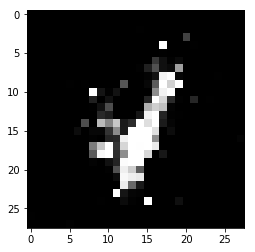

Number batches 78
17(0/78) D: 0.1155, G: 3.6222
17(1/78) D: 0.1287, G: 3.4245
17(2/78) D: 0.1329, G: 2.5081
17(3/78) D: 0.1555, G: 5.4654
17(4/78) D: 0.1459, G: 3.7158
17(5/78) D: 0.1021, G: 3.6585
17(6/78) D: 0.0775, G: 5.2509
17(7/78) D: 0.1059, G: 4.1678
17(8/78) D: 0.1727, G: 1.4799
17(9/78) D: 0.3839, G: 9.4609
17(10/78) D: 0.3805, G: 8.4671
17(11/78) D: 0.3461, G: 3.9974
17(12/78) D: 0.2520, G: 2.9290
17(13/78) D: 0.3178, G: 4.3921
17(14/78) D: 0.1285, G: 3.9849
17(15/78) D: 0.1097, G: 3.3157
17(16/78) D: 0.1480, G: 2.7864
17(17/78) D: 0.1129, G: 3.5597
17(18/78) D: 0.1075, G: 3.5258
17(19/78) D: 0.0678, G: 3.7677
17(20/78) D: 0.1418, G: 3.4079
17(21/78) D: 0.1356, G: 3.1624
17(22/78) D: 0.1147, G: 3.5093
17(23/78) D: 0.0675, G: 3.8974
17(24/78) D: 0.1314, G: 3.1888
17(25/78) D: 0.1227, G: 3.0540
17(26/78) D: 0.1548, G: 3.7764
17(27/78) D: 0.1408, G: 2.9506
17(28/78) D: 0.1168, G: 4.0298
17(29/78) D: 0.1057, G: 3.4717
17(30/78) D: 0.1209, G: 3.2591
17(31/78) D: 0.1109, G: 3.3539


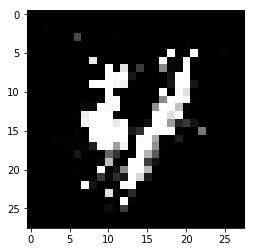

Number batches 78
18(0/78) D: 0.1574, G: 2.4295
18(1/78) D: 0.1544, G: 3.6798
18(2/78) D: 0.2164, G: 2.2331
18(3/78) D: 0.1750, G: 4.1991
18(4/78) D: 0.1418, G: 3.6445
18(5/78) D: 0.1275, G: 2.7574
18(6/78) D: 0.0972, G: 3.4194
18(7/78) D: 0.0677, G: 3.5394
18(8/78) D: 0.1388, G: 2.9705
18(9/78) D: 0.1658, G: 3.9182
18(10/78) D: 0.0981, G: 3.7649
18(11/78) D: 0.0889, G: 3.1543
18(12/78) D: 0.1382, G: 3.2332
18(13/78) D: 0.1193, G: 2.9619
18(14/78) D: 0.1491, G: 3.9769
18(15/78) D: 0.1341, G: 3.6505
18(16/78) D: 0.1727, G: 2.9918
18(17/78) D: 0.1651, G: 3.4401
18(18/78) D: 0.1741, G: 3.5393
18(19/78) D: 0.1506, G: 3.3393
18(20/78) D: 0.1933, G: 2.4821
18(21/78) D: 0.1963, G: 4.7669
18(22/78) D: 0.1632, G: 3.6434
18(23/78) D: 0.0904, G: 2.9921
18(24/78) D: 0.1818, G: 3.0689
18(25/78) D: 0.1868, G: 3.7772
18(26/78) D: 0.1710, G: 2.9285
18(27/78) D: 0.1134, G: 3.7556
18(28/78) D: 0.1530, G: 3.3934
18(29/78) D: 0.1205, G: 3.2688
18(30/78) D: 0.1383, G: 4.0008
18(31/78) D: 0.1596, G: 3.7358


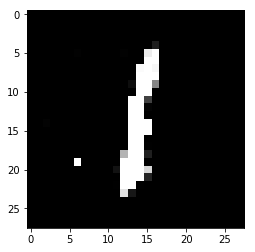

Number batches 78
19(0/78) D: 0.1783, G: 5.0261
19(1/78) D: 0.1644, G: 3.5698
19(2/78) D: 0.1615, G: 2.4143
19(3/78) D: 0.2556, G: 4.8618
19(4/78) D: 0.2411, G: 3.5611
19(5/78) D: 0.1470, G: 2.5746
19(6/78) D: 0.1519, G: 5.1062
19(7/78) D: 0.1933, G: 3.7711
19(8/78) D: 0.1641, G: 1.8075
19(9/78) D: 0.2221, G: 4.7925
19(10/78) D: 0.0708, G: 5.0678
19(11/78) D: 0.2482, G: 2.9520
19(12/78) D: 0.1518, G: 2.6182
19(13/78) D: 0.1838, G: 3.6078
19(14/78) D: 0.0737, G: 4.0028
19(15/78) D: 0.1273, G: 3.4866
19(16/78) D: 0.1231, G: 2.8290
19(17/78) D: 0.1429, G: 4.0296
19(18/78) D: 0.1430, G: 3.8281
19(19/78) D: 0.0961, G: 3.8982
19(20/78) D: 0.1334, G: 2.6550
19(21/78) D: 0.1773, G: 3.2649
19(22/78) D: 0.1474, G: 3.3475
19(23/78) D: 0.1082, G: 3.2767
19(24/78) D: 0.1603, G: 3.0485
19(25/78) D: 0.1476, G: 4.5770
19(26/78) D: 0.2082, G: 2.9784
19(27/78) D: 0.1547, G: 3.4501
19(28/78) D: 0.1295, G: 4.3295
19(29/78) D: 0.1278, G: 2.9218
19(30/78) D: 0.1031, G: 3.0169
19(31/78) D: 0.1589, G: 4.7508


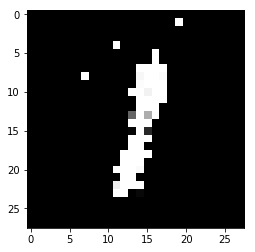

Number batches 78
20(0/78) D: 0.1306, G: 2.9749
20(1/78) D: 0.1050, G: 3.9082
20(2/78) D: 0.1148, G: 3.5228
20(3/78) D: 0.1726, G: 2.2490
20(4/78) D: 0.1635, G: 4.5152
20(5/78) D: 0.1794, G: 3.1756
20(6/78) D: 0.0961, G: 2.9895
20(7/78) D: 0.1339, G: 3.8549
20(8/78) D: 0.1300, G: 2.6906
20(9/78) D: 0.1362, G: 3.7450
20(10/78) D: 0.0675, G: 4.2563
20(11/78) D: 0.1577, G: 2.6254
20(12/78) D: 0.1163, G: 3.3438
20(13/78) D: 0.1021, G: 3.0913
20(14/78) D: 0.0952, G: 3.4525
20(15/78) D: 0.0886, G: 3.8796
20(16/78) D: 0.1317, G: 2.7440
20(17/78) D: 0.0909, G: 3.9073
20(18/78) D: 0.1745, G: 3.0343
20(19/78) D: 0.1228, G: 3.5307
20(20/78) D: 0.1343, G: 2.7130
20(21/78) D: 0.1605, G: 4.0251
20(22/78) D: 0.1564, G: 3.0131
20(23/78) D: 0.1448, G: 3.9148
20(24/78) D: 0.1079, G: 3.1051
20(25/78) D: 0.1203, G: 3.2771
20(26/78) D: 0.1686, G: 2.7560
20(27/78) D: 0.1477, G: 4.5702
20(28/78) D: 0.1856, G: 3.0401
20(29/78) D: 0.1577, G: 2.5178
20(30/78) D: 0.1746, G: 4.3377
20(31/78) D: 0.1160, G: 3.5742


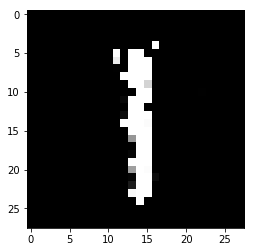

Number batches 78
21(0/78) D: 0.1817, G: 2.6704
21(1/78) D: 0.1495, G: 4.4148
21(2/78) D: 0.1465, G: 3.9142
21(3/78) D: 0.2232, G: 1.2540
21(4/78) D: 0.4403, G: 6.4397
21(5/78) D: 0.5009, G: 4.6236
21(6/78) D: 0.2640, G: 2.2996
21(7/78) D: 0.3037, G: 2.6637
21(8/78) D: 0.1856, G: 2.7497
21(9/78) D: 0.1702, G: 3.2986
21(10/78) D: 0.1105, G: 3.6841
21(11/78) D: 0.2397, G: 2.5038
21(12/78) D: 0.1752, G: 2.6978
21(13/78) D: 0.1847, G: 2.7613
21(14/78) D: 0.1654, G: 3.6032
21(15/78) D: 0.1876, G: 3.4588
21(16/78) D: 0.2082, G: 2.2468
21(17/78) D: 0.1765, G: 3.2350
21(18/78) D: 0.2148, G: 2.6654
21(19/78) D: 0.1897, G: 2.5228
21(20/78) D: 0.1510, G: 2.6085
21(21/78) D: 0.1889, G: 3.0034
21(22/78) D: 0.1736, G: 2.9895
21(23/78) D: 0.1578, G: 3.1366
21(24/78) D: 0.2046, G: 2.3288
21(25/78) D: 0.1714, G: 2.9213
21(26/78) D: 0.2335, G: 2.2421
21(27/78) D: 0.1985, G: 2.7009
21(28/78) D: 0.1360, G: 3.3468
21(29/78) D: 0.2339, G: 2.5709
21(30/78) D: 0.2222, G: 2.0531
21(31/78) D: 0.1807, G: 3.4800


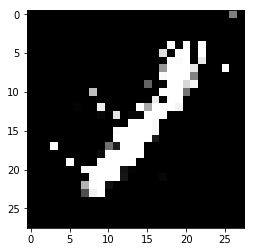

Number batches 78
22(0/78) D: 0.2272, G: 2.9805
22(1/78) D: 0.1543, G: 3.0852
22(2/78) D: 0.2068, G: 1.7846
22(3/78) D: 0.2645, G: 4.3276
22(4/78) D: 0.1999, G: 3.0308
22(5/78) D: 0.1494, G: 2.6131
22(6/78) D: 0.1375, G: 3.6112
22(7/78) D: 0.1480, G: 3.3212
22(8/78) D: 0.1597, G: 2.5167
22(9/78) D: 0.1773, G: 4.2090
22(10/78) D: 0.0677, G: 4.4513
22(11/78) D: 0.1949, G: 2.3886
22(12/78) D: 0.1813, G: 3.6371
22(13/78) D: 0.1847, G: 3.0798
22(14/78) D: 0.1328, G: 3.0413
22(15/78) D: 0.1343, G: 3.2614
22(16/78) D: 0.2133, G: 3.1545
22(17/78) D: 0.1307, G: 3.1238
22(18/78) D: 0.2121, G: 2.8960
22(19/78) D: 0.1059, G: 4.0078
22(20/78) D: 0.1539, G: 2.7321
22(21/78) D: 0.1279, G: 3.0698
22(22/78) D: 0.1799, G: 2.6947
22(23/78) D: 0.1345, G: 4.0451
22(24/78) D: 0.1751, G: 3.0881
22(25/78) D: 0.1404, G: 2.9794
22(26/78) D: 0.2073, G: 2.2640
22(27/78) D: 0.1909, G: 4.7091
22(28/78) D: 0.2052, G: 3.5736
22(29/78) D: 0.2120, G: 1.4958
22(30/78) D: 0.2778, G: 5.2665
22(31/78) D: 0.3131, G: 4.4009


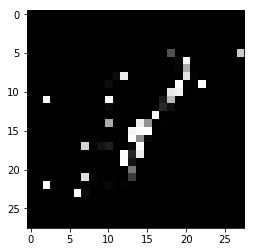

Number batches 78
23(0/78) D: 0.2225, G: 2.7084
23(1/78) D: 0.1350, G: 2.8965
23(2/78) D: 0.1719, G: 2.4058
23(3/78) D: 0.2468, G: 3.0085
23(4/78) D: 0.2293, G: 2.1640
23(5/78) D: 0.2062, G: 4.5684
23(6/78) D: 0.1940, G: 3.5321
23(7/78) D: 0.1667, G: 1.7578
23(8/78) D: 0.2742, G: 4.0014
23(9/78) D: 0.1661, G: 3.3767
23(10/78) D: 0.0866, G: 3.4776
23(11/78) D: 0.1868, G: 2.2672
23(12/78) D: 0.1942, G: 3.3714
23(13/78) D: 0.1937, G: 3.1858
23(14/78) D: 0.1687, G: 2.2227
23(15/78) D: 0.1742, G: 3.3676
23(16/78) D: 0.1948, G: 2.5895
23(17/78) D: 0.1084, G: 3.1248
23(18/78) D: 0.2148, G: 2.5402
23(19/78) D: 0.1697, G: 2.5944
23(20/78) D: 0.1710, G: 3.0735
23(21/78) D: 0.1781, G: 2.6566
23(22/78) D: 0.1862, G: 2.8159
23(23/78) D: 0.1544, G: 3.0569
23(24/78) D: 0.1787, G: 2.5939
23(25/78) D: 0.1297, G: 2.9611
23(26/78) D: 0.2558, G: 2.1089
23(27/78) D: 0.2407, G: 3.5394
23(28/78) D: 0.1564, G: 2.9722
23(29/78) D: 0.1966, G: 1.8479
23(30/78) D: 0.2490, G: 3.5824
23(31/78) D: 0.1917, G: 2.7810


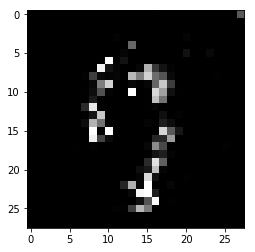

Number batches 78
24(0/78) D: 0.2181, G: 2.6808
24(1/78) D: 0.1757, G: 2.6355
24(2/78) D: 0.1912, G: 2.2806
24(3/78) D: 0.2185, G: 2.3386
24(4/78) D: 0.1774, G: 2.5187
24(5/78) D: 0.1760, G: 3.1106
24(6/78) D: 0.1729, G: 2.9566
24(7/78) D: 0.1993, G: 2.7060
24(8/78) D: 0.2250, G: 2.2908
24(9/78) D: 0.2063, G: 3.0716
24(10/78) D: 0.1172, G: 3.1533
24(11/78) D: 0.2073, G: 2.7255
24(12/78) D: 0.2147, G: 3.2432
24(13/78) D: 0.2519, G: 1.7481
24(14/78) D: 0.2728, G: 4.3791
24(15/78) D: 0.2803, G: 3.3171
24(16/78) D: 0.2572, G: 1.7679
24(17/78) D: 0.2298, G: 2.8722
24(18/78) D: 0.2171, G: 3.1236
24(19/78) D: 0.1685, G: 2.3694
24(20/78) D: 0.1702, G: 2.3530
24(21/78) D: 0.2158, G: 2.6823
24(22/78) D: 0.1791, G: 2.4180
24(23/78) D: 0.1365, G: 2.4949
24(24/78) D: 0.1722, G: 3.1551
24(25/78) D: 0.1427, G: 2.9997
24(26/78) D: 0.2453, G: 2.0053
24(27/78) D: 0.2330, G: 3.7120
24(28/78) D: 0.1672, G: 3.1200
24(29/78) D: 0.2246, G: 2.0093
24(30/78) D: 0.2619, G: 3.2064
24(31/78) D: 0.1565, G: 3.1767


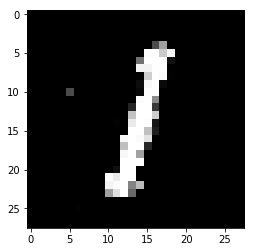

Number batches 78
25(0/78) D: 0.2116, G: 2.1371
25(1/78) D: 0.1618, G: 2.6156
25(2/78) D: 0.1913, G: 2.6328
25(3/78) D: 0.2494, G: 2.2622
25(4/78) D: 0.1781, G: 2.0886
25(5/78) D: 0.2017, G: 2.7240
25(6/78) D: 0.1730, G: 2.6963
25(7/78) D: 0.1824, G: 2.1933
25(8/78) D: 0.2067, G: 2.0054
25(9/78) D: 0.1735, G: 2.7984
25(10/78) D: 0.1235, G: 3.2813
25(11/78) D: 0.1726, G: 2.6073
25(12/78) D: 0.1600, G: 2.3330
25(13/78) D: 0.2140, G: 2.9042
25(14/78) D: 0.1619, G: 3.1423
25(15/78) D: 0.1571, G: 2.5008
25(16/78) D: 0.1717, G: 2.3531
25(17/78) D: 0.1367, G: 3.7566
25(18/78) D: 0.2452, G: 2.6670
25(19/78) D: 0.1661, G: 2.3103
25(20/78) D: 0.1862, G: 2.7617
25(21/78) D: 0.1917, G: 2.3127
25(22/78) D: 0.1751, G: 2.3901
25(23/78) D: 0.1458, G: 3.1000
25(24/78) D: 0.1801, G: 3.2067
25(25/78) D: 0.1501, G: 2.5898
25(26/78) D: 0.2484, G: 2.1907
25(27/78) D: 0.2292, G: 2.5725
25(28/78) D: 0.1721, G: 3.2286
25(29/78) D: 0.2154, G: 2.6547
25(30/78) D: 0.2561, G: 1.6362
25(31/78) D: 0.2632, G: 3.8868


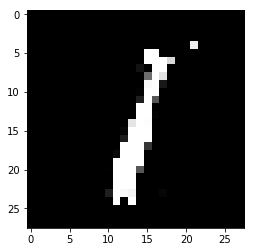

Number batches 78
26(0/78) D: 0.2026, G: 2.3573
26(1/78) D: 0.2012, G: 3.7351
26(2/78) D: 0.1983, G: 2.7373
26(3/78) D: 0.2090, G: 2.1679
26(4/78) D: 0.1840, G: 4.3552
26(5/78) D: 0.1929, G: 3.1142
26(6/78) D: 0.1465, G: 2.5644
26(7/78) D: 0.1706, G: 2.9818
26(8/78) D: 0.2083, G: 2.7118
26(9/78) D: 0.1874, G: 3.6496
26(10/78) D: 0.0974, G: 3.4460
26(11/78) D: 0.1585, G: 2.5667
26(12/78) D: 0.1661, G: 3.8440
26(13/78) D: 0.1812, G: 2.8433
26(14/78) D: 0.2083, G: 2.7584
26(15/78) D: 0.1884, G: 3.6845
26(16/78) D: 0.2224, G: 2.3734
26(17/78) D: 0.1472, G: 3.4689
26(18/78) D: 0.2777, G: 1.6746
26(19/78) D: 0.2372, G: 4.3542
26(20/78) D: 0.2701, G: 3.3251
26(21/78) D: 0.2348, G: 2.0644
26(22/78) D: 0.2951, G: 3.0921
26(23/78) D: 0.1785, G: 2.8767
26(24/78) D: 0.2038, G: 2.0949
26(25/78) D: 0.2134, G: 2.7814
26(26/78) D: 0.2074, G: 2.5326
26(27/78) D: 0.2255, G: 2.4953
26(28/78) D: 0.1350, G: 2.7517
26(29/78) D: 0.1779, G: 2.7752
26(30/78) D: 0.2019, G: 1.8658
26(31/78) D: 0.2180, G: 3.4855


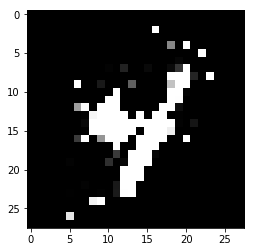

Number batches 78
27(0/78) D: 0.2128, G: 2.2999
27(1/78) D: 0.2272, G: 3.4602
27(2/78) D: 0.2911, G: 1.2845
27(3/78) D: 0.4137, G: 4.8823
27(4/78) D: 0.3887, G: 3.0620
27(5/78) D: 0.2091, G: 1.4537
27(6/78) D: 0.2588, G: 3.4795
27(7/78) D: 0.2178, G: 3.4095
27(8/78) D: 0.3040, G: 2.3009
27(9/78) D: 0.2278, G: 2.4699
27(10/78) D: 0.1511, G: 3.0580
27(11/78) D: 0.2122, G: 2.7343
27(12/78) D: 0.1925, G: 2.2871
27(13/78) D: 0.2429, G: 2.3385
27(14/78) D: 0.1658, G: 2.4340
27(15/78) D: 0.1666, G: 2.5284
27(16/78) D: 0.1970, G: 2.3822
27(17/78) D: 0.1823, G: 2.9550
27(18/78) D: 0.2302, G: 2.3503
27(19/78) D: 0.1776, G: 2.5394
27(20/78) D: 0.1658, G: 2.7582
27(21/78) D: 0.2143, G: 2.5388
27(22/78) D: 0.2305, G: 2.2474
27(23/78) D: 0.1772, G: 2.7251
27(24/78) D: 0.1783, G: 2.4368
27(25/78) D: 0.1743, G: 2.2289
27(26/78) D: 0.2758, G: 2.8089
27(27/78) D: 0.2138, G: 2.1139
27(28/78) D: 0.1547, G: 2.7753
27(29/78) D: 0.2093, G: 2.5265
27(30/78) D: 0.2473, G: 1.7765
27(31/78) D: 0.2578, G: 3.6317


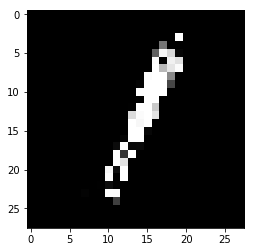

Number batches 78
28(0/78) D: 0.2745, G: 3.0202
28(1/78) D: 0.2003, G: 2.0912
28(2/78) D: 0.2287, G: 3.0506
28(3/78) D: 0.2383, G: 2.1900
28(4/78) D: 0.1757, G: 3.1625
28(5/78) D: 0.2044, G: 2.6014
28(6/78) D: 0.1516, G: 3.1019
28(7/78) D: 0.1826, G: 3.2067
28(8/78) D: 0.2257, G: 1.6367
28(9/78) D: 0.3260, G: 5.0045
28(10/78) D: 0.3404, G: 3.3434
28(11/78) D: 0.2341, G: 2.4509
28(12/78) D: 0.2707, G: 3.4579
28(13/78) D: 0.2390, G: 2.8955
28(14/78) D: 0.1813, G: 2.3538
28(15/78) D: 0.1440, G: 2.3216
28(16/78) D: 0.1879, G: 2.3698
28(17/78) D: 0.1585, G: 3.1685
28(18/78) D: 0.2148, G: 2.4633
28(19/78) D: 0.1379, G: 2.5372
28(20/78) D: 0.1603, G: 2.8138
28(21/78) D: 0.1823, G: 2.6870
28(22/78) D: 0.2215, G: 2.0032
28(23/78) D: 0.1775, G: 2.6696
28(24/78) D: 0.2128, G: 2.8388
28(25/78) D: 0.1867, G: 2.8091
28(26/78) D: 0.2501, G: 2.2952
28(27/78) D: 0.2705, G: 2.9037
28(28/78) D: 0.1655, G: 2.9155
28(29/78) D: 0.1891, G: 2.5643
28(30/78) D: 0.2437, G: 2.0416
28(31/78) D: 0.2104, G: 3.4909


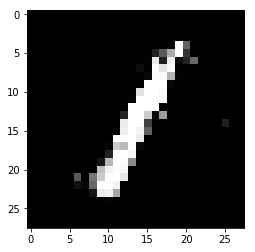

Number batches 78
29(0/78) D: 0.2554, G: 2.2911
29(1/78) D: 0.1781, G: 2.5410
29(2/78) D: 0.2156, G: 2.4170
29(3/78) D: 0.2304, G: 2.7083
29(4/78) D: 0.2113, G: 2.4951
29(5/78) D: 0.1985, G: 2.8444
29(6/78) D: 0.1499, G: 2.5917
29(7/78) D: 0.1871, G: 2.1138
29(8/78) D: 0.2929, G: 2.6759
29(9/78) D: 0.2091, G: 2.3725
29(10/78) D: 0.1695, G: 3.2419
29(11/78) D: 0.2321, G: 2.5566
29(12/78) D: 0.2005, G: 2.5333
29(13/78) D: 0.2250, G: 2.2598
29(14/78) D: 0.2193, G: 3.4601
29(15/78) D: 0.1819, G: 2.7170
29(16/78) D: 0.2323, G: 1.9816
29(17/78) D: 0.1721, G: 3.1873
29(18/78) D: 0.2686, G: 2.7413
29(19/78) D: 0.1706, G: 2.3101
29(20/78) D: 0.1864, G: 2.8784
29(21/78) D: 0.1666, G: 2.6549
29(22/78) D: 0.2160, G: 1.9554
29(23/78) D: 0.1729, G: 3.5143
29(24/78) D: 0.2347, G: 2.5306
29(25/78) D: 0.1302, G: 2.5150
29(26/78) D: 0.2258, G: 2.3766
29(27/78) D: 0.2004, G: 2.4616
29(28/78) D: 0.1674, G: 2.5452
29(29/78) D: 0.1549, G: 2.6593
29(30/78) D: 0.1958, G: 2.6329
29(31/78) D: 0.1509, G: 2.7281


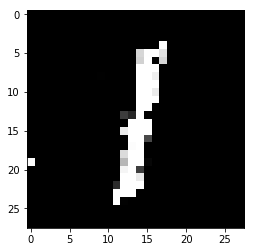

Number batches 78
30(0/78) D: 0.2380, G: 3.0443
30(1/78) D: 0.2118, G: 2.3459
30(2/78) D: 0.2130, G: 1.9960
30(3/78) D: 0.2950, G: 2.8944
30(4/78) D: 0.2146, G: 2.6440
30(5/78) D: 0.1984, G: 2.3338
30(6/78) D: 0.1677, G: 3.1240
30(7/78) D: 0.1887, G: 2.6451
30(8/78) D: 0.2692, G: 1.8217
30(9/78) D: 0.2655, G: 2.9707
30(10/78) D: 0.1493, G: 2.9842
30(11/78) D: 0.2328, G: 2.7718
30(12/78) D: 0.1953, G: 2.5014
30(13/78) D: 0.2684, G: 3.0884
30(14/78) D: 0.2204, G: 2.0663
30(15/78) D: 0.1935, G: 2.6415
30(16/78) D: 0.1871, G: 2.5896
30(17/78) D: 0.1857, G: 2.3768
30(18/78) D: 0.2258, G: 2.9792
30(19/78) D: 0.1958, G: 2.8884
30(20/78) D: 0.2007, G: 2.2424
30(21/78) D: 0.2303, G: 3.1528
30(22/78) D: 0.2305, G: 2.2459
30(23/78) D: 0.1926, G: 2.9343
30(24/78) D: 0.1857, G: 2.5841
30(25/78) D: 0.1523, G: 2.2197
30(26/78) D: 0.2543, G: 2.8968
30(27/78) D: 0.2293, G: 1.9810
30(28/78) D: 0.2072, G: 3.3406
30(29/78) D: 0.1845, G: 3.0546
30(30/78) D: 0.2027, G: 2.1751
30(31/78) D: 0.2048, G: 3.9590


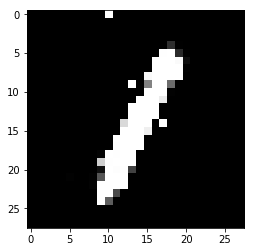

Number batches 78
31(0/78) D: 0.1654, G: 2.7675
31(1/78) D: 0.1045, G: 2.9640
31(2/78) D: 0.1729, G: 2.5246
31(3/78) D: 0.1781, G: 2.1350
31(4/78) D: 0.1232, G: 3.5950
31(5/78) D: 0.1379, G: 3.1259
31(6/78) D: 0.0946, G: 3.1282
31(7/78) D: 0.1001, G: 3.4349
31(8/78) D: 0.1317, G: 2.4475
31(9/78) D: 0.1673, G: 5.9899
31(10/78) D: 0.2088, G: 4.1147
31(11/78) D: 0.2178, G: 1.8205
31(12/78) D: 0.3008, G: 5.2897
31(13/78) D: 0.4037, G: 3.2620
31(14/78) D: 0.1369, G: 1.8165
31(15/78) D: 0.2395, G: 3.8413
31(16/78) D: 0.1999, G: 3.1202
31(17/78) D: 0.1959, G: 1.9606
31(18/78) D: 0.2440, G: 2.6127
31(19/78) D: 0.1628, G: 3.1763
31(20/78) D: 0.2020, G: 2.5246
31(21/78) D: 0.2415, G: 2.0742
31(22/78) D: 0.1999, G: 2.8066
31(23/78) D: 0.1902, G: 2.7419
31(24/78) D: 0.2140, G: 2.5548
31(25/78) D: 0.1763, G: 3.0663
31(26/78) D: 0.2498, G: 2.0986
31(27/78) D: 0.2256, G: 2.3974
31(28/78) D: 0.1903, G: 2.4151
31(29/78) D: 0.1983, G: 2.5155
31(30/78) D: 0.1985, G: 2.5806
31(31/78) D: 0.1726, G: 3.1433


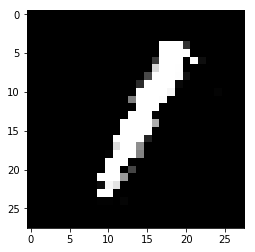

Number batches 78
32(0/78) D: 0.2004, G: 2.7213
32(1/78) D: 0.1429, G: 3.2801
32(2/78) D: 0.2217, G: 1.7437
32(3/78) D: 0.3258, G: 4.1492
32(4/78) D: 0.2330, G: 2.5820
32(5/78) D: 0.1636, G: 2.2707
32(6/78) D: 0.1567, G: 3.6821
32(7/78) D: 0.2086, G: 2.8855
32(8/78) D: 0.2117, G: 2.1441
32(9/78) D: 0.1906, G: 3.3290
32(10/78) D: 0.1270, G: 3.3886
32(11/78) D: 0.1816, G: 2.6832
32(12/78) D: 0.1676, G: 3.6311
32(13/78) D: 0.2225, G: 2.5825
32(14/78) D: 0.1659, G: 3.2465
32(15/78) D: 0.1769, G: 2.5398
32(16/78) D: 0.1933, G: 2.8935
32(17/78) D: 0.1567, G: 3.7262
32(18/78) D: 0.2473, G: 2.4435
32(19/78) D: 0.2175, G: 2.9346
32(20/78) D: 0.1916, G: 2.9019
32(21/78) D: 0.1955, G: 2.1294
32(22/78) D: 0.2124, G: 3.3807
32(23/78) D: 0.1744, G: 3.2104
32(24/78) D: 0.1707, G: 2.0516
32(25/78) D: 0.1812, G: 3.8528
32(26/78) D: 0.2540, G: 2.1850
32(27/78) D: 0.2260, G: 3.2775
32(28/78) D: 0.1561, G: 3.1064
32(29/78) D: 0.1628, G: 2.4024
32(30/78) D: 0.1796, G: 2.8492
32(31/78) D: 0.1590, G: 2.8797


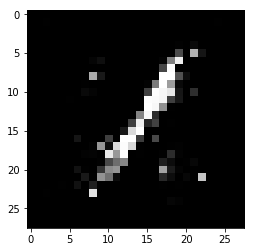

Number batches 78
33(0/78) D: 0.2223, G: 2.7925
33(1/78) D: 0.1676, G: 2.3639
33(2/78) D: 0.1677, G: 3.0692
33(3/78) D: 0.2558, G: 2.4589
33(4/78) D: 0.1756, G: 2.7038
33(5/78) D: 0.1864, G: 3.1272
33(6/78) D: 0.1794, G: 2.7232
33(7/78) D: 0.1755, G: 2.1188
33(8/78) D: 0.1904, G: 2.7508
33(9/78) D: 0.1496, G: 3.2820
33(10/78) D: 0.1428, G: 2.8164
33(11/78) D: 0.1825, G: 3.4579
33(12/78) D: 0.1603, G: 2.7647
33(13/78) D: 0.1849, G: 3.3327
33(14/78) D: 0.1310, G: 2.6667
33(15/78) D: 0.1413, G: 3.0800
33(16/78) D: 0.1710, G: 2.4858
33(17/78) D: 0.1393, G: 4.6415
33(18/78) D: 0.3434, G: 1.3072
33(19/78) D: 0.3008, G: 4.7497
33(20/78) D: 0.2289, G: 4.4062
33(21/78) D: 0.2321, G: 2.4323
33(22/78) D: 0.2249, G: 1.9668
33(23/78) D: 0.1897, G: 2.9214
33(24/78) D: 0.1902, G: 3.1288
33(25/78) D: 0.1377, G: 2.6265
33(26/78) D: 0.2017, G: 2.0674
33(27/78) D: 0.1916, G: 2.6523
33(28/78) D: 0.1322, G: 3.4086
33(29/78) D: 0.2015, G: 2.6006
33(30/78) D: 0.1799, G: 2.3653
33(31/78) D: 0.1887, G: 3.3475


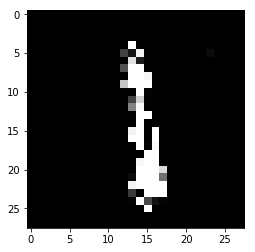

Number batches 78
34(0/78) D: 0.2905, G: 3.0361
34(1/78) D: 0.1672, G: 2.2177
34(2/78) D: 0.1976, G: 2.9710
34(3/78) D: 0.2423, G: 2.5641
34(4/78) D: 0.2271, G: 2.3465
34(5/78) D: 0.1854, G: 3.4085
34(6/78) D: 0.1443, G: 2.9976
34(7/78) D: 0.1883, G: 2.6941
34(8/78) D: 0.2359, G: 3.1012
34(9/78) D: 0.2491, G: 2.3429
34(10/78) D: 0.2026, G: 3.7402
34(11/78) D: 0.2276, G: 2.3829
34(12/78) D: 0.1983, G: 3.8415
34(13/78) D: 0.2215, G: 2.4264
34(14/78) D: 0.2152, G: 3.0396
34(15/78) D: 0.1737, G: 2.8361
34(16/78) D: 0.1643, G: 2.5939
34(17/78) D: 0.2010, G: 2.9197
34(18/78) D: 0.2415, G: 2.3153
34(19/78) D: 0.2536, G: 3.1139
34(20/78) D: 0.1992, G: 2.9743
34(21/78) D: 0.2577, G: 1.4227
34(22/78) D: 0.3364, G: 3.8877
34(23/78) D: 0.3316, G: 2.5744
34(24/78) D: 0.2289, G: 1.6047
34(25/78) D: 0.2798, G: 2.8542
34(26/78) D: 0.2508, G: 2.3856
34(27/78) D: 0.2515, G: 1.9722
34(28/78) D: 0.2341, G: 2.5867
34(29/78) D: 0.2257, G: 2.4083
34(30/78) D: 0.2638, G: 1.8069
34(31/78) D: 0.2172, G: 2.5404


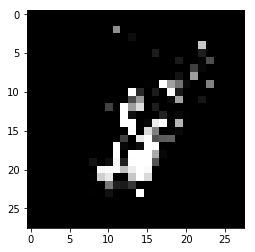

Number batches 78
35(0/78) D: 0.1884, G: 3.1009
35(1/78) D: 0.1586, G: 3.0173
35(2/78) D: 0.1916, G: 1.8483
35(3/78) D: 0.2249, G: 4.4256
35(4/78) D: 0.2242, G: 2.0398
35(5/78) D: 0.1701, G: 2.8442
35(6/78) D: 0.1306, G: 3.7444
35(7/78) D: 0.1834, G: 2.6376
35(8/78) D: 0.1638, G: 2.2861
35(9/78) D: 0.1514, G: 3.4683
35(10/78) D: 0.1309, G: 3.1970
35(11/78) D: 0.1242, G: 3.1463
35(12/78) D: 0.1322, G: 3.1369
35(13/78) D: 0.1813, G: 2.5616
35(14/78) D: 0.1823, G: 5.4650
35(15/78) D: 0.2212, G: 3.1275
35(16/78) D: 0.1664, G: 2.1784
35(17/78) D: 0.1560, G: 4.4889
35(18/78) D: 0.2905, G: 2.9652
35(19/78) D: 0.1102, G: 2.2823
35(20/78) D: 0.1539, G: 3.6426
35(21/78) D: 0.1750, G: 2.9811
35(22/78) D: 0.1776, G: 1.8495
35(23/78) D: 0.1792, G: 4.1577
35(24/78) D: 0.1972, G: 2.9186
35(25/78) D: 0.1603, G: 2.0062
35(26/78) D: 0.2671, G: 5.2909
35(27/78) D: 0.3872, G: 1.9287
35(28/78) D: 0.2373, G: 3.6165
35(29/78) D: 0.1927, G: 3.1975
35(30/78) D: 0.2042, G: 2.1113
35(31/78) D: 0.2240, G: 2.7830


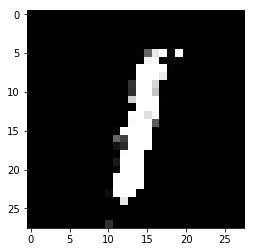

Number batches 78
36(0/78) D: 0.2137, G: 2.2291
36(1/78) D: 0.2239, G: 3.0249
36(2/78) D: 0.2400, G: 2.5062
36(3/78) D: 0.1969, G: 1.7877
36(4/78) D: 0.2485, G: 4.1116
36(5/78) D: 0.2643, G: 3.2256
36(6/78) D: 0.1584, G: 2.0814
36(7/78) D: 0.2437, G: 2.9525
36(8/78) D: 0.2362, G: 2.4841
36(9/78) D: 0.1952, G: 2.4173
36(10/78) D: 0.1577, G: 2.9477
36(11/78) D: 0.1789, G: 2.5608
36(12/78) D: 0.2169, G: 3.5612
36(13/78) D: 0.2456, G: 2.5290
36(14/78) D: 0.1958, G: 2.3472
36(15/78) D: 0.1682, G: 2.9912
36(16/78) D: 0.2025, G: 2.4157
36(17/78) D: 0.1319, G: 2.4082
36(18/78) D: 0.2020, G: 2.1628
36(19/78) D: 0.2065, G: 3.2642
36(20/78) D: 0.2165, G: 2.7686
36(21/78) D: 0.2078, G: 2.0420
36(22/78) D: 0.1909, G: 2.7293
36(23/78) D: 0.1908, G: 2.5413
36(24/78) D: 0.1865, G: 2.3106
36(25/78) D: 0.1737, G: 2.2468
36(26/78) D: 0.2366, G: 3.0972
36(27/78) D: 0.1897, G: 2.5840
36(28/78) D: 0.1477, G: 2.3303
36(29/78) D: 0.2063, G: 2.7827
36(30/78) D: 0.2189, G: 2.4222
36(31/78) D: 0.1958, G: 2.8357


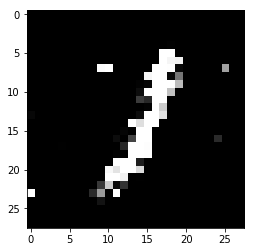

Number batches 78
37(0/78) D: 0.2173, G: 1.7345
37(1/78) D: 0.2552, G: 3.8214
37(2/78) D: 0.2715, G: 2.7244
37(3/78) D: 0.2615, G: 1.8929
37(4/78) D: 0.2328, G: 3.3112
37(5/78) D: 0.2136, G: 2.8457
37(6/78) D: 0.1493, G: 2.6322
37(7/78) D: 0.2014, G: 2.3308
37(8/78) D: 0.2187, G: 2.5772
37(9/78) D: 0.2391, G: 3.4037
37(10/78) D: 0.2136, G: 3.2039
37(11/78) D: 0.1903, G: 2.4703
37(12/78) D: 0.2261, G: 3.1248
37(13/78) D: 0.1824, G: 2.5621
37(14/78) D: 0.1756, G: 2.4117
37(15/78) D: 0.1787, G: 2.4543
37(16/78) D: 0.2017, G: 3.2034
37(17/78) D: 0.1507, G: 2.7035
37(18/78) D: 0.2473, G: 2.6387
37(19/78) D: 0.1842, G: 2.9893
37(20/78) D: 0.1660, G: 2.4006
37(21/78) D: 0.2124, G: 2.2736
37(22/78) D: 0.2129, G: 2.7703
37(23/78) D: 0.1724, G: 2.7457
37(24/78) D: 0.2018, G: 2.3330
37(25/78) D: 0.1969, G: 2.9913
37(26/78) D: 0.2327, G: 2.1104
37(27/78) D: 0.2392, G: 3.9819
37(28/78) D: 0.2291, G: 2.9642
37(29/78) D: 0.2144, G: 2.1615
37(30/78) D: 0.2292, G: 2.1888
37(31/78) D: 0.1939, G: 3.0722


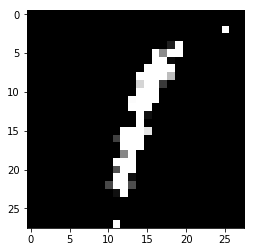

Number batches 78
38(0/78) D: 0.2342, G: 1.6145
38(1/78) D: 0.2654, G: 3.2480
38(2/78) D: 0.2336, G: 2.8322
38(3/78) D: 0.2497, G: 1.4453
38(4/78) D: 0.2720, G: 2.8125
38(5/78) D: 0.2306, G: 2.9581
38(6/78) D: 0.1568, G: 2.7986
38(7/78) D: 0.2001, G: 2.7180
38(8/78) D: 0.2056, G: 2.2883
38(9/78) D: 0.2256, G: 2.7858
38(10/78) D: 0.1979, G: 2.5380
38(11/78) D: 0.2036, G: 2.9284
38(12/78) D: 0.1793, G: 2.7213
38(13/78) D: 0.2255, G: 2.4209
38(14/78) D: 0.1985, G: 2.6291
38(15/78) D: 0.1453, G: 2.8497
38(16/78) D: 0.2200, G: 2.6393
38(17/78) D: 0.1849, G: 3.2248
38(18/78) D: 0.3131, G: 1.5633
38(19/78) D: 0.2854, G: 3.5868
38(20/78) D: 0.2351, G: 2.8749
38(21/78) D: 0.2321, G: 1.8677
38(22/78) D: 0.2632, G: 2.3970
38(23/78) D: 0.1889, G: 3.1768
38(24/78) D: 0.2311, G: 2.1115
38(25/78) D: 0.1974, G: 2.1813
38(26/78) D: 0.2525, G: 2.7575
38(27/78) D: 0.2564, G: 2.5333
38(28/78) D: 0.1595, G: 2.6006
38(29/78) D: 0.1906, G: 2.1356
38(30/78) D: 0.2628, G: 2.3197
38(31/78) D: 0.2174, G: 2.5490


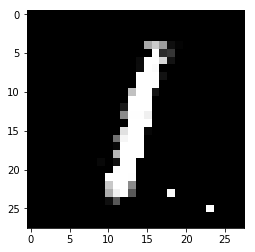

Number batches 78
39(0/78) D: 0.2420, G: 2.1071
39(1/78) D: 0.1949, G: 2.3924
39(2/78) D: 0.2308, G: 2.2682
39(3/78) D: 0.2326, G: 2.3127
39(4/78) D: 0.1875, G: 2.6335
39(5/78) D: 0.1750, G: 2.7626
39(6/78) D: 0.1680, G: 2.4254
39(7/78) D: 0.2013, G: 2.6568
39(8/78) D: 0.2237, G: 2.3884
39(9/78) D: 0.2309, G: 2.9060
39(10/78) D: 0.1851, G: 2.2272
39(11/78) D: 0.1934, G: 2.5767
39(12/78) D: 0.1951, G: 2.8267
39(13/78) D: 0.2077, G: 2.1662
39(14/78) D: 0.1765, G: 2.8991
39(15/78) D: 0.1893, G: 2.6633
39(16/78) D: 0.2295, G: 2.4422
39(17/78) D: 0.1763, G: 2.4341
39(18/78) D: 0.2205, G: 2.4359
39(19/78) D: 0.1539, G: 2.6009
39(20/78) D: 0.1517, G: 2.5901
39(21/78) D: 0.2255, G: 2.7033
39(22/78) D: 0.1890, G: 2.1227
39(23/78) D: 0.1861, G: 3.4276
39(24/78) D: 0.2053, G: 2.3431
39(25/78) D: 0.1831, G: 3.0071
39(26/78) D: 0.2284, G: 2.0727
39(27/78) D: 0.2093, G: 2.6803
39(28/78) D: 0.1419, G: 3.1060
39(29/78) D: 0.2011, G: 2.8832
39(30/78) D: 0.2400, G: 1.8129
39(31/78) D: 0.3027, G: 4.3825


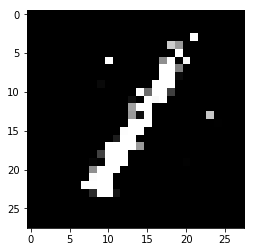

Number batches 78
40(0/78) D: 0.2682, G: 1.9910
40(1/78) D: 0.1938, G: 2.1817
40(2/78) D: 0.1888, G: 2.8060
40(3/78) D: 0.2589, G: 2.2127
40(4/78) D: 0.1847, G: 2.7207
40(5/78) D: 0.1923, G: 2.5110
40(6/78) D: 0.1743, G: 3.4669
40(7/78) D: 0.2067, G: 3.0920
40(8/78) D: 0.2185, G: 1.5974
40(9/78) D: 0.2658, G: 2.9460
40(10/78) D: 0.1574, G: 2.9105
40(11/78) D: 0.1739, G: 2.3392
40(12/78) D: 0.2316, G: 3.3076
40(13/78) D: 0.2349, G: 2.5342
40(14/78) D: 0.1614, G: 2.3533
40(15/78) D: 0.1854, G: 2.6282
40(16/78) D: 0.2045, G: 2.9109
40(17/78) D: 0.1727, G: 2.3707
40(18/78) D: 0.1983, G: 2.4514
40(19/78) D: 0.1917, G: 3.5406
40(20/78) D: 0.2069, G: 2.7717
40(21/78) D: 0.2045, G: 1.7909
40(22/78) D: 0.2718, G: 4.1238
40(23/78) D: 0.2286, G: 2.5658
40(24/78) D: 0.1622, G: 2.0910
40(25/78) D: 0.2291, G: 3.8214
40(26/78) D: 0.3564, G: 1.6096
40(27/78) D: 0.2394, G: 2.4147
40(28/78) D: 0.1776, G: 2.7941
40(29/78) D: 0.2016, G: 2.3234
40(30/78) D: 0.2273, G: 2.0246
40(31/78) D: 0.2071, G: 2.7014


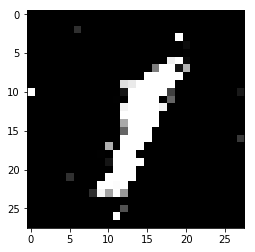

Number batches 78
41(0/78) D: 0.3730, G: 3.3542
41(1/78) D: 0.1946, G: 2.5814
41(2/78) D: 0.1759, G: 1.9788
41(3/78) D: 0.2325, G: 2.4319
41(4/78) D: 0.1925, G: 2.7312
41(5/78) D: 0.1646, G: 2.9092
41(6/78) D: 0.1488, G: 3.0651
41(7/78) D: 0.1551, G: 2.4809
41(8/78) D: 0.2635, G: 3.2458
41(9/78) D: 0.2121, G: 2.2534
41(10/78) D: 0.1657, G: 3.3335
41(11/78) D: 0.1924, G: 2.2073
41(12/78) D: 0.2554, G: 3.4578
41(13/78) D: 0.2069, G: 2.6099
41(14/78) D: 0.1916, G: 1.9393
41(15/78) D: 0.1854, G: 2.7253
41(16/78) D: 0.1948, G: 3.1296
41(17/78) D: 0.1515, G: 3.0086
41(18/78) D: 0.2417, G: 1.9002
41(19/78) D: 0.2047, G: 3.1794
41(20/78) D: 0.2023, G: 3.0604
41(21/78) D: 0.2345, G: 1.5711
41(22/78) D: 0.2713, G: 2.8897
41(23/78) D: 0.1605, G: 3.0298
41(24/78) D: 0.1952, G: 2.5305
41(25/78) D: 0.1791, G: 1.8955
41(26/78) D: 0.2486, G: 2.2474
41(27/78) D: 0.2216, G: 3.1232
41(28/78) D: 0.1759, G: 2.8295
41(29/78) D: 0.1953, G: 2.2674
41(30/78) D: 0.2242, G: 2.4521
41(31/78) D: 0.1900, G: 2.5230


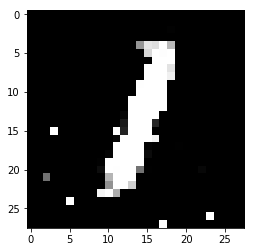

Number batches 78
42(0/78) D: 0.2501, G: 3.2407
42(1/78) D: 0.2019, G: 3.1005
42(2/78) D: 0.1714, G: 2.4488
42(3/78) D: 0.2650, G: 2.1710
42(4/78) D: 0.2487, G: 2.5718
42(5/78) D: 0.1972, G: 2.5851
42(6/78) D: 0.1472, G: 2.9115
42(7/78) D: 0.1704, G: 2.7725
42(8/78) D: 0.2326, G: 2.3806
42(9/78) D: 0.2927, G: 2.6663
42(10/78) D: 0.1753, G: 4.8417
42(11/78) D: 0.2749, G: 2.1239
42(12/78) D: 0.2011, G: 2.1638
42(13/78) D: 0.2771, G: 4.0267
42(14/78) D: 0.2658, G: 2.1000
42(15/78) D: 0.2024, G: 2.6157
42(16/78) D: 0.2000, G: 2.7970
42(17/78) D: 0.1922, G: 2.9458
42(18/78) D: 0.2517, G: 2.3522
42(19/78) D: 0.1752, G: 2.8897
42(20/78) D: 0.1903, G: 3.0393
42(21/78) D: 0.2116, G: 1.8099
42(22/78) D: 0.2556, G: 3.2108
42(23/78) D: 0.1727, G: 2.5484
42(24/78) D: 0.1912, G: 2.9563
42(25/78) D: 0.1809, G: 2.3005
42(26/78) D: 0.2443, G: 2.5345
42(27/78) D: 0.2165, G: 2.4120
42(28/78) D: 0.1624, G: 3.7349
42(29/78) D: 0.2922, G: 1.3388
42(30/78) D: 0.3463, G: 5.0334
42(31/78) D: 0.4474, G: 2.1031


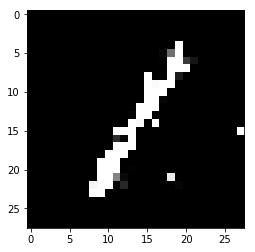

Number batches 78
43(0/78) D: 0.2615, G: 2.5422
43(1/78) D: 0.2003, G: 2.5649
43(2/78) D: 0.2100, G: 1.9959
43(3/78) D: 0.2767, G: 2.6738
43(4/78) D: 0.2180, G: 2.3162
43(5/78) D: 0.1991, G: 2.5209
43(6/78) D: 0.1896, G: 3.2783
43(7/78) D: 0.2022, G: 2.3779
43(8/78) D: 0.2682, G: 2.4547
43(9/78) D: 0.2254, G: 2.2348
43(10/78) D: 0.1780, G: 3.1009
43(11/78) D: 0.1961, G: 2.1447
43(12/78) D: 0.2422, G: 3.3477
43(13/78) D: 0.1956, G: 2.0954
43(14/78) D: 0.2567, G: 2.7880
43(15/78) D: 0.2190, G: 2.6444
43(16/78) D: 0.1953, G: 2.5452
43(17/78) D: 0.1990, G: 2.3992
43(18/78) D: 0.2530, G: 2.7899
43(19/78) D: 0.1652, G: 2.8725
43(20/78) D: 0.1899, G: 2.2147
43(21/78) D: 0.2767, G: 3.3860
43(22/78) D: 0.2976, G: 1.2226
43(23/78) D: 0.2932, G: 3.8488
43(24/78) D: 0.3587, G: 1.4972
43(25/78) D: 0.4443, G: 3.2983
43(26/78) D: 0.3156, G: 2.2374
43(27/78) D: 0.2260, G: 1.7182
43(28/78) D: 0.2894, G: 2.8372
43(29/78) D: 0.2538, G: 2.3632
43(30/78) D: 0.2419, G: 2.2411
43(31/78) D: 0.2004, G: 2.3774


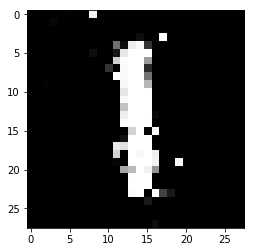

Number batches 78
44(0/78) D: 0.2546, G: 1.4727
44(1/78) D: 0.3214, G: 2.2344
44(2/78) D: 0.2296, G: 2.4787
44(3/78) D: 0.2733, G: 2.1505
44(4/78) D: 0.2561, G: 1.7915
44(5/78) D: 0.2746, G: 2.8218
44(6/78) D: 0.2068, G: 2.8653
44(7/78) D: 0.2568, G: 1.9499
44(8/78) D: 0.3171, G: 2.5333
44(9/78) D: 0.2903, G: 1.9255
44(10/78) D: 0.1924, G: 2.8502
44(11/78) D: 0.2445, G: 2.2605
44(12/78) D: 0.2283, G: 2.2494
44(13/78) D: 0.2249, G: 2.3191
44(14/78) D: 0.2188, G: 2.7508
44(15/78) D: 0.2435, G: 2.1776
44(16/78) D: 0.2396, G: 2.4178
44(17/78) D: 0.2069, G: 3.1411
44(18/78) D: 0.3005, G: 1.6978
44(19/78) D: 0.2482, G: 2.6082
44(20/78) D: 0.2327, G: 2.7610
44(21/78) D: 0.3395, G: 1.7611
44(22/78) D: 0.3013, G: 2.2431
44(23/78) D: 0.2239, G: 2.0569
44(24/78) D: 0.2685, G: 1.6644
44(25/78) D: 0.2504, G: 2.7592
44(26/78) D: 0.2771, G: 2.4206
44(27/78) D: 0.2528, G: 1.6017
44(28/78) D: 0.2349, G: 2.5304
44(29/78) D: 0.2218, G: 2.4862
44(30/78) D: 0.2799, G: 1.9147
44(31/78) D: 0.2338, G: 2.6158


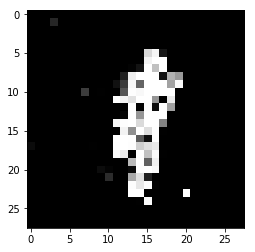

Number batches 78
45(0/78) D: 0.2710, G: 3.4197
45(1/78) D: 0.2449, G: 1.8311
45(2/78) D: 0.2383, G: 2.7979
45(3/78) D: 0.2497, G: 2.2919
45(4/78) D: 0.1945, G: 2.3667
45(5/78) D: 0.2255, G: 3.2283
45(6/78) D: 0.2459, G: 2.0663
45(7/78) D: 0.2679, G: 2.9019
45(8/78) D: 0.2974, G: 1.9891
45(9/78) D: 0.2927, G: 2.3908
45(10/78) D: 0.1677, G: 3.0755
45(11/78) D: 0.2223, G: 2.6373
45(12/78) D: 0.2179, G: 2.4157
45(13/78) D: 0.2142, G: 2.4894
45(14/78) D: 0.2254, G: 2.8184
45(15/78) D: 0.2322, G: 2.2932
45(16/78) D: 0.2089, G: 2.9213
45(17/78) D: 0.2310, G: 2.5199
45(18/78) D: 0.2971, G: 2.5695
45(19/78) D: 0.1748, G: 3.1069
45(20/78) D: 0.2266, G: 2.0354
45(21/78) D: 0.2474, G: 2.0649
45(22/78) D: 0.2816, G: 2.4224
45(23/78) D: 0.2256, G: 2.6427
45(24/78) D: 0.2850, G: 1.6015
45(25/78) D: 0.2596, G: 3.7362
45(26/78) D: 0.3516, G: 1.6965
45(27/78) D: 0.2689, G: 2.4266
45(28/78) D: 0.2256, G: 2.7278
45(29/78) D: 0.2414, G: 1.7463
45(30/78) D: 0.2797, G: 2.5283
45(31/78) D: 0.2228, G: 2.4966


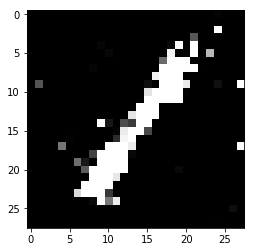

Number batches 78
46(0/78) D: 0.2741, G: 1.9440
46(1/78) D: 0.3155, G: 2.1943
46(2/78) D: 0.2931, G: 1.8157
46(3/78) D: 0.3453, G: 2.1856
46(4/78) D: 0.3158, G: 1.8417
46(5/78) D: 0.2900, G: 1.5703
46(6/78) D: 0.3267, G: 2.4979
46(7/78) D: 0.3170, G: 2.3545
46(8/78) D: 0.3072, G: 1.5878
46(9/78) D: 0.3705, G: 2.4570
46(10/78) D: 0.2574, G: 2.2084
46(11/78) D: 0.2749, G: 2.0236
46(12/78) D: 0.2462, G: 2.1775
46(13/78) D: 0.2842, G: 2.2145
46(14/78) D: 0.2561, G: 2.1050
46(15/78) D: 0.2035, G: 2.2391
46(16/78) D: 0.2505, G: 2.5724
46(17/78) D: 0.2145, G: 2.7868
46(18/78) D: 0.2776, G: 2.0041
46(19/78) D: 0.2371, G: 2.1271
46(20/78) D: 0.2448, G: 2.5182
46(21/78) D: 0.2881, G: 1.6262
46(22/78) D: 0.2603, G: 2.2332
46(23/78) D: 0.2303, G: 2.7718
46(24/78) D: 0.2738, G: 1.9668
46(25/78) D: 0.2310, G: 2.4864
46(26/78) D: 0.2907, G: 2.1750
46(27/78) D: 0.2670, G: 2.4229
46(28/78) D: 0.2020, G: 2.6291
46(29/78) D: 0.2573, G: 1.9004
46(30/78) D: 0.2846, G: 2.7101
46(31/78) D: 0.2474, G: 2.3345


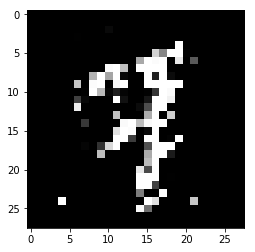

Number batches 78
47(0/78) D: 0.2802, G: 2.2234
47(1/78) D: 0.2156, G: 2.2226
47(2/78) D: 0.2888, G: 1.8418
47(3/78) D: 0.2826, G: 2.7194
47(4/78) D: 0.2426, G: 2.3889
47(5/78) D: 0.2503, G: 2.4501
47(6/78) D: 0.2430, G: 2.5431
47(7/78) D: 0.2434, G: 2.9339
47(8/78) D: 0.3017, G: 1.1756
47(9/78) D: 0.3800, G: 4.9697
47(10/78) D: 0.5174, G: 2.3091
47(11/78) D: 0.2548, G: 1.8146
47(12/78) D: 0.2856, G: 2.9118
47(13/78) D: 0.3032, G: 2.2815
47(14/78) D: 0.2878, G: 2.1894
47(15/78) D: 0.2417, G: 2.1575
47(16/78) D: 0.2475, G: 2.2668
47(17/78) D: 0.1751, G: 2.2272
47(18/78) D: 0.2724, G: 2.2669
47(19/78) D: 0.2023, G: 2.4636
47(20/78) D: 0.2165, G: 2.5909
47(21/78) D: 0.2600, G: 1.7386
47(22/78) D: 0.2697, G: 2.5274
47(23/78) D: 0.2512, G: 2.1228
47(24/78) D: 0.2776, G: 2.1298
47(25/78) D: 0.2753, G: 2.4081
47(26/78) D: 0.2952, G: 2.1069
47(27/78) D: 0.2545, G: 1.8452
47(28/78) D: 0.2307, G: 2.9845
47(29/78) D: 0.2599, G: 2.2387
47(30/78) D: 0.2646, G: 1.8001
47(31/78) D: 0.2936, G: 3.2920


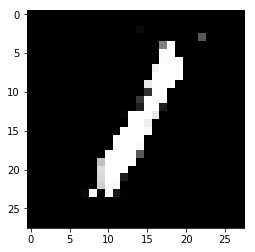

Number batches 78
48(0/78) D: 0.2883, G: 1.8586
48(1/78) D: 0.2582, G: 2.5504
48(2/78) D: 0.2670, G: 2.2030
48(3/78) D: 0.2857, G: 1.9180
48(4/78) D: 0.2277, G: 2.2981
48(5/78) D: 0.2239, G: 2.6453
48(6/78) D: 0.2220, G: 2.6213
48(7/78) D: 0.2275, G: 2.2399
48(8/78) D: 0.3481, G: 2.7187
48(9/78) D: 0.3177, G: 1.5567
48(10/78) D: 0.2715, G: 3.2762
48(11/78) D: 0.3617, G: 1.6663
48(12/78) D: 0.2628, G: 2.1600
48(13/78) D: 0.2311, G: 2.5302
48(14/78) D: 0.2417, G: 2.2063
48(15/78) D: 0.2235, G: 1.9644
48(16/78) D: 0.2237, G: 2.5505
48(17/78) D: 0.2213, G: 2.4035
48(18/78) D: 0.2567, G: 2.0351
48(19/78) D: 0.2657, G: 3.4587
48(20/78) D: 0.2435, G: 2.5962
48(21/78) D: 0.2738, G: 1.4184
48(22/78) D: 0.3021, G: 2.9926
48(23/78) D: 0.2126, G: 2.8603
48(24/78) D: 0.2356, G: 1.7135
48(25/78) D: 0.2822, G: 2.8495
48(26/78) D: 0.2774, G: 2.2300
48(27/78) D: 0.2295, G: 1.8089
48(28/78) D: 0.2082, G: 2.6739
48(29/78) D: 0.2433, G: 1.8191
48(30/78) D: 0.3001, G: 2.9951
48(31/78) D: 0.2321, G: 2.2871


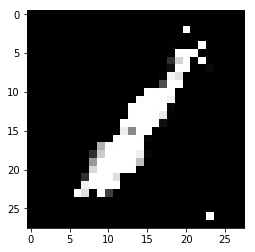

Number batches 78
49(0/78) D: 0.3161, G: 2.4826
49(1/78) D: 0.1944, G: 2.1197
49(2/78) D: 0.2633, G: 2.5921
49(3/78) D: 0.2960, G: 1.5105
49(4/78) D: 0.2775, G: 2.7804
49(5/78) D: 0.2494, G: 2.2589
49(6/78) D: 0.2280, G: 3.1598
49(7/78) D: 0.2308, G: 2.4516
49(8/78) D: 0.2699, G: 2.3683
49(9/78) D: 0.2259, G: 3.1313
49(10/78) D: 0.2284, G: 2.8936
49(11/78) D: 0.2735, G: 1.1205
49(12/78) D: 0.4892, G: 4.7572
49(13/78) D: 0.6273, G: 1.9896
49(14/78) D: 0.2709, G: 1.4971
49(15/78) D: 0.3868, G: 2.5851
49(16/78) D: 0.2680, G: 2.5407
49(17/78) D: 0.1884, G: 2.5308
49(18/78) D: 0.3459, G: 1.5020
49(19/78) D: 0.2718, G: 2.0221
49(20/78) D: 0.2269, G: 2.5616
49(21/78) D: 0.3069, G: 2.0644
49(22/78) D: 0.2831, G: 1.6648
49(23/78) D: 0.2669, G: 2.1909
49(24/78) D: 0.2755, G: 2.2782
49(25/78) D: 0.2176, G: 2.0278
49(26/78) D: 0.3579, G: 2.4101
49(27/78) D: 0.3335, G: 1.7967
49(28/78) D: 0.2473, G: 2.4573
49(29/78) D: 0.2845, G: 2.0342
49(30/78) D: 0.2857, G: 2.0148
49(31/78) D: 0.2257, G: 2.0322


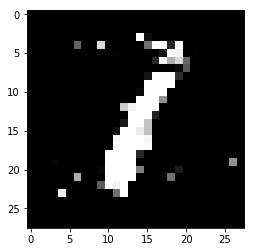

Number batches 78
50(0/78) D: 0.2660, G: 1.7059
50(1/78) D: 0.2698, G: 2.3518
50(2/78) D: 0.2319, G: 2.1561
50(3/78) D: 0.2800, G: 1.8901
50(4/78) D: 0.2416, G: 2.8596
50(5/78) D: 0.3000, G: 1.8908
50(6/78) D: 0.2036, G: 2.1650
50(7/78) D: 0.2463, G: 3.2006
50(8/78) D: 0.3106, G: 1.6086
50(9/78) D: 0.3388, G: 2.7069
50(10/78) D: 0.2050, G: 2.3042
50(11/78) D: 0.2162, G: 1.8050
50(12/78) D: 0.2854, G: 2.5523
50(13/78) D: 0.2655, G: 2.3634
50(14/78) D: 0.2560, G: 1.9068
50(15/78) D: 0.2248, G: 2.7231
50(16/78) D: 0.2196, G: 2.6435
50(17/78) D: 0.1893, G: 2.4858
50(18/78) D: 0.2490, G: 1.5486
50(19/78) D: 0.2653, G: 3.8497
50(20/78) D: 0.2724, G: 2.3705
50(21/78) D: 0.2321, G: 2.1811
50(22/78) D: 0.2276, G: 2.3520
50(23/78) D: 0.1910, G: 2.3298
50(24/78) D: 0.2652, G: 2.4123
50(25/78) D: 0.2260, G: 2.0291
50(26/78) D: 0.2436, G: 2.3870
50(27/78) D: 0.2683, G: 2.5963
50(28/78) D: 0.2121, G: 2.1599
50(29/78) D: 0.2389, G: 2.3496
50(30/78) D: 0.2793, G: 2.6059
50(31/78) D: 0.2454, G: 2.1075


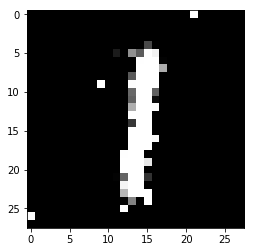

Number batches 78
51(0/78) D: 0.3048, G: 2.0279
51(1/78) D: 0.2596, G: 2.1244
51(2/78) D: 0.2642, G: 2.0944
51(3/78) D: 0.2773, G: 2.4280
51(4/78) D: 0.2808, G: 1.9428
51(5/78) D: 0.2630, G: 2.3675
51(6/78) D: 0.2232, G: 2.3887
51(7/78) D: 0.2760, G: 3.6563
51(8/78) D: 0.4101, G: 0.9807
51(9/78) D: 0.4686, G: 3.3761
51(10/78) D: 0.3264, G: 2.5134
51(11/78) D: 0.3201, G: 1.5253
51(12/78) D: 0.3116, G: 2.5202
51(13/78) D: 0.2632, G: 2.5388
51(14/78) D: 0.2341, G: 2.0776
51(15/78) D: 0.2514, G: 2.2631
51(16/78) D: 0.2617, G: 2.1573
51(17/78) D: 0.2198, G: 2.5833
51(18/78) D: 0.2976, G: 1.9983
51(19/78) D: 0.2372, G: 1.8526
51(20/78) D: 0.2256, G: 2.6537
51(21/78) D: 0.2450, G: 2.1504
51(22/78) D: 0.2758, G: 1.9613
51(23/78) D: 0.2621, G: 2.2777
51(24/78) D: 0.2938, G: 3.1016
51(25/78) D: 0.3427, G: 1.3487
51(26/78) D: 0.4409, G: 3.2624
51(27/78) D: 0.3745, G: 1.9196
51(28/78) D: 0.2251, G: 1.5703
51(29/78) D: 0.2936, G: 2.2289
51(30/78) D: 0.2684, G: 2.2436
51(31/78) D: 0.2222, G: 1.6970


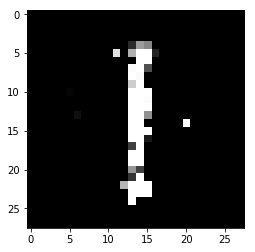

Number batches 78
52(0/78) D: 0.3041, G: 1.7395
52(1/78) D: 0.2872, G: 2.3225
52(2/78) D: 0.2984, G: 1.9016
52(3/78) D: 0.2707, G: 1.8371
52(4/78) D: 0.2894, G: 2.5965
52(5/78) D: 0.3198, G: 1.9654
52(6/78) D: 0.2592, G: 1.9624
52(7/78) D: 0.3004, G: 2.8633
52(8/78) D: 0.3034, G: 1.8390
52(9/78) D: 0.3190, G: 1.9679
52(10/78) D: 0.2724, G: 3.0035
52(11/78) D: 0.2711, G: 1.9457
52(12/78) D: 0.1974, G: 1.9829
52(13/78) D: 0.2634, G: 2.7849
52(14/78) D: 0.2710, G: 1.9860
52(15/78) D: 0.2883, G: 2.0197
52(16/78) D: 0.2783, G: 2.5947
52(17/78) D: 0.2606, G: 2.4477
52(18/78) D: 0.2725, G: 1.7597
52(19/78) D: 0.3242, G: 3.3068
52(20/78) D: 0.2900, G: 2.5390
52(21/78) D: 0.3010, G: 1.0217
52(22/78) D: 0.5019, G: 3.7347
52(23/78) D: 0.5177, G: 1.6399
52(24/78) D: 0.2868, G: 1.6029
52(25/78) D: 0.3209, G: 2.2929
52(26/78) D: 0.3170, G: 2.2640
52(27/78) D: 0.2700, G: 2.0244
52(28/78) D: 0.2779, G: 2.0800
52(29/78) D: 0.2986, G: 2.0455
52(30/78) D: 0.3137, G: 1.8270
52(31/78) D: 0.2584, G: 1.9090


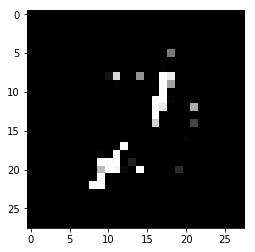

Number batches 78
53(0/78) D: 0.2871, G: 1.8418
53(1/78) D: 0.2842, G: 2.0028
53(2/78) D: 0.3255, G: 2.2174
53(3/78) D: 0.3107, G: 1.8942
53(4/78) D: 0.2579, G: 2.1934
53(5/78) D: 0.2298, G: 2.3641
53(6/78) D: 0.2184, G: 2.3910
53(7/78) D: 0.2001, G: 2.2638
53(8/78) D: 0.2464, G: 2.2737
53(9/78) D: 0.2442, G: 2.3723
53(10/78) D: 0.2099, G: 3.1955
53(11/78) D: 0.2054, G: 2.5550
53(12/78) D: 0.2282, G: 2.5992
53(13/78) D: 0.2063, G: 1.8812
53(14/78) D: 0.2485, G: 2.5801
53(15/78) D: 0.2376, G: 2.4033
53(16/78) D: 0.2456, G: 2.2798
53(17/78) D: 0.2401, G: 3.6819
53(18/78) D: 0.3715, G: 2.0493
53(19/78) D: 0.2289, G: 2.2617
53(20/78) D: 0.2308, G: 2.5432
53(21/78) D: 0.2527, G: 1.9858
53(22/78) D: 0.2760, G: 2.1954
53(23/78) D: 0.2277, G: 2.3692
53(24/78) D: 0.2569, G: 1.9319
53(25/78) D: 0.2886, G: 2.7485
53(26/78) D: 0.3088, G: 1.9073
53(27/78) D: 0.2868, G: 2.0803
53(28/78) D: 0.2234, G: 2.3880
53(29/78) D: 0.2391, G: 2.3929
53(30/78) D: 0.2886, G: 2.4725
53(31/78) D: 0.2523, G: 1.9118


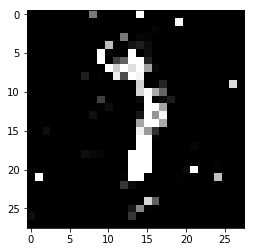

Number batches 78
54(0/78) D: 0.2560, G: 2.0114
54(1/78) D: 0.2568, G: 2.0654
54(2/78) D: 0.2847, G: 2.1320
54(3/78) D: 0.2752, G: 2.1408
54(4/78) D: 0.2540, G: 2.9050
54(5/78) D: 0.2503, G: 2.1489
54(6/78) D: 0.2749, G: 2.3808
54(7/78) D: 0.2898, G: 2.4527
54(8/78) D: 0.3191, G: 1.7045
54(9/78) D: 0.4121, G: 3.5065
54(10/78) D: 0.4065, G: 1.2851
54(11/78) D: 0.4982, G: 3.4729
54(12/78) D: 0.4202, G: 2.3094
54(13/78) D: 0.3339, G: 1.5675
54(14/78) D: 0.3062, G: 2.0314
54(15/78) D: 0.2542, G: 2.3173
54(16/78) D: 0.2685, G: 2.0300
54(17/78) D: 0.2474, G: 2.2684
54(18/78) D: 0.2926, G: 1.9873
54(19/78) D: 0.2176, G: 2.0187
54(20/78) D: 0.2295, G: 2.5179
54(21/78) D: 0.3231, G: 1.5884
54(22/78) D: 0.2964, G: 2.1380
54(23/78) D: 0.2404, G: 2.4039
54(24/78) D: 0.3281, G: 1.8235
54(25/78) D: 0.2804, G: 2.3366
54(26/78) D: 0.2939, G: 2.1332
54(27/78) D: 0.3105, G: 1.8788
54(28/78) D: 0.2568, G: 2.5786
54(29/78) D: 0.2770, G: 1.7396
54(30/78) D: 0.2950, G: 2.4288
54(31/78) D: 0.2516, G: 2.0858


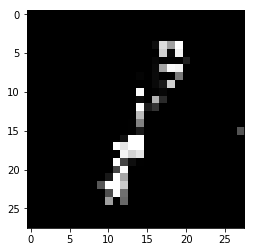

Number batches 78
55(0/78) D: 0.2820, G: 2.2531
55(1/78) D: 0.2622, G: 2.3957
55(2/78) D: 0.2783, G: 1.8673
55(3/78) D: 0.2479, G: 1.9064
55(4/78) D: 0.2649, G: 2.1466
55(5/78) D: 0.2556, G: 2.6151
55(6/78) D: 0.2498, G: 2.3408
55(7/78) D: 0.2684, G: 2.0305
55(8/78) D: 0.3319, G: 2.8704
55(9/78) D: 0.2991, G: 1.3113
55(10/78) D: 0.3390, G: 3.5611
55(11/78) D: 0.4170, G: 1.9693
55(12/78) D: 0.2893, G: 2.2681
55(13/78) D: 0.2534, G: 2.3615
55(14/78) D: 0.2544, G: 1.7991
55(15/78) D: 0.2537, G: 1.9486
55(16/78) D: 0.2770, G: 2.7162
55(17/78) D: 0.2285, G: 2.1195
55(18/78) D: 0.2903, G: 2.3752
55(19/78) D: 0.2026, G: 2.3178
55(20/78) D: 0.2584, G: 2.3671
55(21/78) D: 0.2776, G: 1.5661
55(22/78) D: 0.2801, G: 2.5595
55(23/78) D: 0.2348, G: 2.3359
55(24/78) D: 0.2539, G: 1.6101
55(25/78) D: 0.2545, G: 2.6376
55(26/78) D: 0.2837, G: 2.0493
55(27/78) D: 0.2982, G: 1.6637
55(28/78) D: 0.2466, G: 2.3704
55(29/78) D: 0.2603, G: 2.8612
55(30/78) D: 0.3816, G: 1.0885
55(31/78) D: 0.4630, G: 3.4166


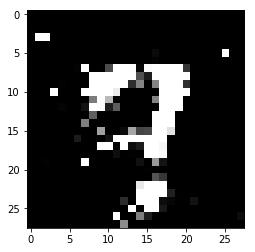

Number batches 78
56(0/78) D: 0.3231, G: 2.1592
56(1/78) D: 0.2803, G: 2.2306
56(2/78) D: 0.3102, G: 1.4939
56(3/78) D: 0.3684, G: 3.0170
56(4/78) D: 0.4028, G: 1.5425
56(5/78) D: 0.3141, G: 2.6483
56(6/78) D: 0.2877, G: 2.0691
56(7/78) D: 0.2574, G: 1.9555
56(8/78) D: 0.2671, G: 2.1283
56(9/78) D: 0.3241, G: 2.7116
56(10/78) D: 0.2699, G: 1.9031
56(11/78) D: 0.2751, G: 2.2459
56(12/78) D: 0.2454, G: 2.1585
56(13/78) D: 0.2865, G: 2.1973
56(14/78) D: 0.2611, G: 2.1070
56(15/78) D: 0.3007, G: 2.2913
56(16/78) D: 0.3123, G: 2.2216
56(17/78) D: 0.2551, G: 2.1842
56(18/78) D: 0.2910, G: 2.0525
56(19/78) D: 0.2742, G: 2.8477
56(20/78) D: 0.2626, G: 2.0684
56(21/78) D: 0.2814, G: 1.8981
56(22/78) D: 0.2497, G: 2.4562
56(23/78) D: 0.2357, G: 2.2792
56(24/78) D: 0.2751, G: 2.1241
56(25/78) D: 0.2741, G: 2.8659
56(26/78) D: 0.3510, G: 1.3486
56(27/78) D: 0.4058, G: 3.4029
56(28/78) D: 0.3457, G: 2.0153
56(29/78) D: 0.2611, G: 1.4374
56(30/78) D: 0.3511, G: 3.1501
56(31/78) D: 0.3359, G: 2.1845


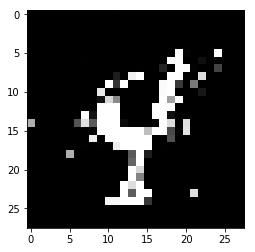

Number batches 78
57(0/78) D: 0.3482, G: 1.9581
57(1/78) D: 0.3118, G: 1.9806
57(2/78) D: 0.2575, G: 1.8786
57(3/78) D: 0.3552, G: 2.2799
57(4/78) D: 0.3163, G: 2.3432
57(5/78) D: 0.2835, G: 2.2246
57(6/78) D: 0.2813, G: 1.9421
57(7/78) D: 0.2973, G: 2.5744
57(8/78) D: 0.3351, G: 1.2097
57(9/78) D: 0.5190, G: 4.0983
57(10/78) D: 0.5689, G: 1.5781
57(11/78) D: 0.3331, G: 1.5162
57(12/78) D: 0.3880, G: 2.4168
57(13/78) D: 0.3714, G: 2.1131
57(14/78) D: 0.2842, G: 1.6833
57(15/78) D: 0.2805, G: 2.0347
57(16/78) D: 0.3166, G: 1.9943
57(17/78) D: 0.2592, G: 1.7249
57(18/78) D: 0.3043, G: 2.5717
57(19/78) D: 0.3020, G: 2.4849
57(20/78) D: 0.2722, G: 1.9314
57(21/78) D: 0.2913, G: 1.9909
57(22/78) D: 0.3268, G: 2.2429
57(23/78) D: 0.2890, G: 1.6465
57(24/78) D: 0.3336, G: 2.7868
57(25/78) D: 0.4066, G: 1.1204
57(26/78) D: 0.5178, G: 3.4851
57(27/78) D: 0.5226, G: 1.8132
57(28/78) D: 0.2620, G: 1.4409
57(29/78) D: 0.2913, G: 2.2956
57(30/78) D: 0.3121, G: 1.8555
57(31/78) D: 0.3311, G: 1.9381


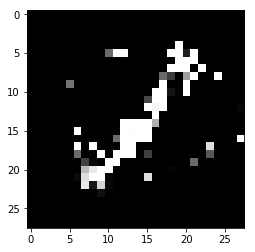

Number batches 78
58(0/78) D: 0.3264, G: 1.6192
58(1/78) D: 0.3198, G: 1.9761
58(2/78) D: 0.2770, G: 1.8587
58(3/78) D: 0.2920, G: 1.8071
58(4/78) D: 0.3304, G: 2.1604
58(5/78) D: 0.2669, G: 2.0950
58(6/78) D: 0.2887, G: 2.0772
58(7/78) D: 0.2921, G: 1.7851
58(8/78) D: 0.3564, G: 2.4203
58(9/78) D: 0.3305, G: 1.6010
58(10/78) D: 0.2609, G: 2.2192
58(11/78) D: 0.2777, G: 2.3090
58(12/78) D: 0.3069, G: 1.6159
58(13/78) D: 0.4202, G: 2.4759
58(14/78) D: 0.2890, G: 2.2991
58(15/78) D: 0.3335, G: 1.5524
58(16/78) D: 0.3443, G: 2.6067
58(17/78) D: 0.2915, G: 1.7802
58(18/78) D: 0.3014, G: 2.1450
58(19/78) D: 0.2583, G: 2.0117
58(20/78) D: 0.2693, G: 2.3227
58(21/78) D: 0.3082, G: 1.7108
58(22/78) D: 0.2708, G: 2.1353
58(23/78) D: 0.3081, G: 2.1176
58(24/78) D: 0.2592, G: 1.6070
58(25/78) D: 0.3831, G: 3.2551
58(26/78) D: 0.4681, G: 1.3149
58(27/78) D: 0.3800, G: 2.5985
58(28/78) D: 0.2629, G: 2.4128
58(29/78) D: 0.3189, G: 1.5993
58(30/78) D: 0.4048, G: 1.8671
58(31/78) D: 0.2949, G: 2.2613


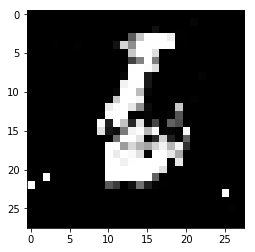

Number batches 78
59(0/78) D: 0.3715, G: 2.5725
59(1/78) D: 0.2691, G: 2.4578
59(2/78) D: 0.3135, G: 1.6029
59(3/78) D: 0.3133, G: 2.2998
59(4/78) D: 0.2442, G: 2.3536
59(5/78) D: 0.2453, G: 2.8556
59(6/78) D: 0.3156, G: 1.3926
59(7/78) D: 0.3249, G: 2.6260
59(8/78) D: 0.4066, G: 1.8014
59(9/78) D: 0.2812, G: 1.6949
59(10/78) D: 0.2472, G: 2.4961
59(11/78) D: 0.2670, G: 2.1052
59(12/78) D: 0.2637, G: 1.9154
59(13/78) D: 0.2907, G: 1.8944
59(14/78) D: 0.2499, G: 2.0743
59(15/78) D: 0.2455, G: 2.1832
59(16/78) D: 0.2413, G: 2.4254
59(17/78) D: 0.2326, G: 2.3910
59(18/78) D: 0.2751, G: 1.9459
59(19/78) D: 0.2545, G: 2.6593
59(20/78) D: 0.3121, G: 2.7675
59(21/78) D: 0.3437, G: 1.4704
59(22/78) D: 0.3875, G: 3.0660
59(23/78) D: 0.3095, G: 2.3510
59(24/78) D: 0.2731, G: 1.6181
59(25/78) D: 0.3877, G: 3.0837
59(26/78) D: 0.4308, G: 1.4048
59(27/78) D: 0.3837, G: 2.1427
59(28/78) D: 0.2888, G: 2.2053
59(29/78) D: 0.3132, G: 1.6393
59(30/78) D: 0.3020, G: 1.8697
59(31/78) D: 0.2719, G: 3.1149


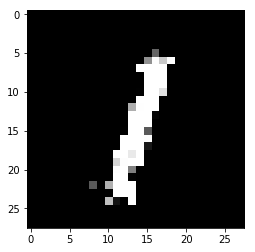

Number batches 78
60(0/78) D: 0.3202, G: 2.1276
60(1/78) D: 0.3093, G: 1.9820
60(2/78) D: 0.3035, G: 2.4342
60(3/78) D: 0.2930, G: 1.8173
60(4/78) D: 0.2812, G: 2.3142
60(5/78) D: 0.2660, G: 2.3986
60(6/78) D: 0.2652, G: 2.0686
60(7/78) D: 0.2820, G: 2.8733
60(8/78) D: 0.3877, G: 0.9967
60(9/78) D: 0.4769, G: 4.6324
60(10/78) D: 0.6806, G: 1.2051
60(11/78) D: 0.4183, G: 1.8421
60(12/78) D: 0.3716, G: 2.4344
60(13/78) D: 0.3402, G: 1.9693
60(14/78) D: 0.2733, G: 1.5255
60(15/78) D: 0.3099, G: 1.9680
60(16/78) D: 0.3053, G: 2.5310
60(17/78) D: 0.3072, G: 2.0524
60(18/78) D: 0.3197, G: 1.5522
60(19/78) D: 0.3385, G: 2.5461
60(20/78) D: 0.2915, G: 2.1228
60(21/78) D: 0.3015, G: 1.9268
60(22/78) D: 0.3129, G: 2.3734
60(23/78) D: 0.3057, G: 1.6614
60(24/78) D: 0.3017, G: 2.0300
60(25/78) D: 0.3027, G: 1.9322
60(26/78) D: 0.3552, G: 2.5347
60(27/78) D: 0.3073, G: 1.6332
60(28/78) D: 0.3199, G: 2.3358
60(29/78) D: 0.2727, G: 2.2147
60(30/78) D: 0.3124, G: 1.4314
60(31/78) D: 0.4188, G: 3.1263


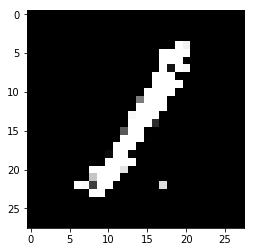

Number batches 78
61(0/78) D: 0.3010, G: 2.0517
61(1/78) D: 0.2749, G: 2.1741
61(2/78) D: 0.2858, G: 1.7430
61(3/78) D: 0.3867, G: 2.0244
61(4/78) D: 0.3103, G: 2.0770
61(5/78) D: 0.2679, G: 2.3084
61(6/78) D: 0.2942, G: 2.1428
61(7/78) D: 0.2787, G: 2.1773
61(8/78) D: 0.3227, G: 1.8711
61(9/78) D: 0.3343, G: 2.8041
61(10/78) D: 0.3232, G: 1.5062
61(11/78) D: 0.2971, G: 2.9309
61(12/78) D: 0.3765, G: 1.4472
61(13/78) D: 0.3678, G: 2.6775
61(14/78) D: 0.3328, G: 2.0001
61(15/78) D: 0.2777, G: 1.7293
61(16/78) D: 0.3056, G: 2.7525
61(17/78) D: 0.2947, G: 1.9285
61(18/78) D: 0.3172, G: 1.8136
61(19/78) D: 0.3137, G: 2.7239
61(20/78) D: 0.2829, G: 2.0179
61(21/78) D: 0.3237, G: 1.8315
61(22/78) D: 0.3171, G: 1.9673
61(23/78) D: 0.2514, G: 2.2756
61(24/78) D: 0.3131, G: 1.7708
61(25/78) D: 0.3018, G: 3.0047
61(26/78) D: 0.4151, G: 1.4478
61(27/78) D: 0.4039, G: 3.2305
61(28/78) D: 0.3762, G: 1.9157
61(29/78) D: 0.3086, G: 1.4986
61(30/78) D: 0.3366, G: 2.2867
61(31/78) D: 0.3203, G: 2.0903


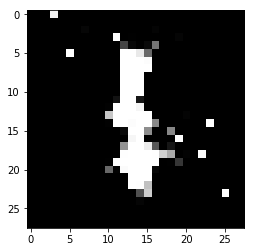

Number batches 78
62(0/78) D: 0.3008, G: 1.8142
62(1/78) D: 0.2962, G: 2.4154
62(2/78) D: 0.3349, G: 1.7181
62(3/78) D: 0.3616, G: 2.7855
62(4/78) D: 0.3588, G: 2.0149
62(5/78) D: 0.2655, G: 1.8721
62(6/78) D: 0.2482, G: 2.1603
62(7/78) D: 0.2555, G: 2.5689
62(8/78) D: 0.3749, G: 1.2631
62(9/78) D: 0.3985, G: 2.6425
62(10/78) D: 0.3498, G: 2.0996
62(11/78) D: 0.2948, G: 1.7740
62(12/78) D: 0.2807, G: 1.7090
62(13/78) D: 0.2536, G: 1.8457
62(14/78) D: 0.3053, G: 1.7806
62(15/78) D: 0.3217, G: 2.2529
62(16/78) D: 0.2789, G: 2.1698
62(17/78) D: 0.2916, G: 2.1535
62(18/78) D: 0.3680, G: 1.8926
62(19/78) D: 0.2933, G: 2.7594
62(20/78) D: 0.3092, G: 1.8530
62(21/78) D: 0.3000, G: 1.6770
62(22/78) D: 0.3340, G: 2.6064
62(23/78) D: 0.3329, G: 1.9310
62(24/78) D: 0.3046, G: 2.0269
62(25/78) D: 0.2872, G: 1.8521
62(26/78) D: 0.2831, G: 1.9598
62(27/78) D: 0.3176, G: 2.4377
62(28/78) D: 0.2698, G: 1.9427
62(29/78) D: 0.3120, G: 1.7932
62(30/78) D: 0.3070, G: 2.1984
62(31/78) D: 0.2724, G: 2.0528


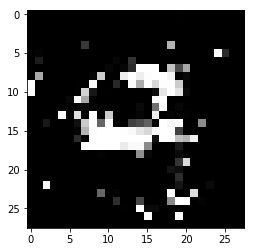

Number batches 78
63(0/78) D: 0.3061, G: 2.1488
63(1/78) D: 0.2762, G: 1.9241
63(2/78) D: 0.3363, G: 2.0557
63(3/78) D: 0.3111, G: 1.7880
63(4/78) D: 0.2574, G: 2.2884
63(5/78) D: 0.2831, G: 1.9753
63(6/78) D: 0.2595, G: 2.1700
63(7/78) D: 0.2707, G: 2.1277
63(8/78) D: 0.3062, G: 1.3096
63(9/78) D: 0.3552, G: 3.0214
63(10/78) D: 0.3042, G: 1.8949
63(11/78) D: 0.3415, G: 2.0543
63(12/78) D: 0.3501, G: 2.3912
63(13/78) D: 0.3411, G: 1.7432
63(14/78) D: 0.3271, G: 2.1979
63(15/78) D: 0.2889, G: 2.2651
63(16/78) D: 0.2853, G: 2.0280
63(17/78) D: 0.2794, G: 2.2680
63(18/78) D: 0.2931, G: 1.7684
63(19/78) D: 0.2946, G: 2.6557
63(20/78) D: 0.2634, G: 2.2137
63(21/78) D: 0.3282, G: 1.4830
63(22/78) D: 0.3688, G: 2.7285
63(23/78) D: 0.3320, G: 1.5423
63(24/78) D: 0.3432, G: 2.2307
63(25/78) D: 0.2907, G: 1.9233
63(26/78) D: 0.3638, G: 1.7655
63(27/78) D: 0.3923, G: 2.9320
63(28/78) D: 0.3918, G: 1.7778
63(29/78) D: 0.2845, G: 1.7394
63(30/78) D: 0.3400, G: 2.5327
63(31/78) D: 0.2759, G: 1.9909


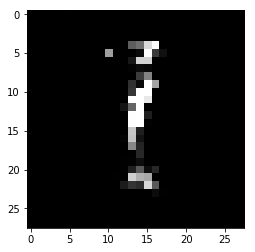

Number batches 78
64(0/78) D: 0.3686, G: 2.8502
64(1/78) D: 0.3542, G: 1.6546
64(2/78) D: 0.3511, G: 2.0817
64(3/78) D: 0.4311, G: 1.9465
64(4/78) D: 0.3447, G: 2.3508
64(5/78) D: 0.3640, G: 1.8080
64(6/78) D: 0.3347, G: 2.7727
64(7/78) D: 0.3606, G: 1.5927
64(8/78) D: 0.4443, G: 2.3060
64(9/78) D: 0.3932, G: 1.5478
64(10/78) D: 0.4042, G: 2.5853
64(11/78) D: 0.3801, G: 1.5669
64(12/78) D: 0.3485, G: 1.6665
64(13/78) D: 0.3792, G: 2.3053
64(14/78) D: 0.3664, G: 1.4680
64(15/78) D: 0.3409, G: 1.7615
64(16/78) D: 0.2967, G: 2.0573
64(17/78) D: 0.3081, G: 1.7309
64(18/78) D: 0.3812, G: 2.0542
64(19/78) D: 0.3562, G: 1.9553
64(20/78) D: 0.3215, G: 1.8289
64(21/78) D: 0.3271, G: 2.1295
64(22/78) D: 0.3315, G: 1.6154
64(23/78) D: 0.3274, G: 2.6215
64(24/78) D: 0.4164, G: 0.8106
64(25/78) D: 0.5877, G: 4.1229
64(26/78) D: 0.7762, G: 1.4210
64(27/78) D: 0.4454, G: 1.1168
64(28/78) D: 0.3707, G: 1.5884
64(29/78) D: 0.3482, G: 1.8327
64(30/78) D: 0.3822, G: 1.3653
64(31/78) D: 0.3132, G: 1.4416


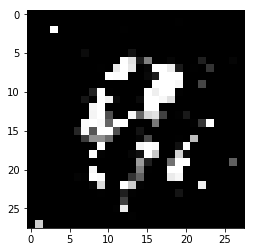

Number batches 78
65(0/78) D: 0.3160, G: 1.8363
65(1/78) D: 0.2950, G: 1.9259
65(2/78) D: 0.2783, G: 1.9029
65(3/78) D: 0.3263, G: 1.8818
65(4/78) D: 0.3015, G: 2.4619
65(5/78) D: 0.3236, G: 2.3207
65(6/78) D: 0.2994, G: 1.6187
65(7/78) D: 0.3226, G: 2.3876
65(8/78) D: 0.4013, G: 1.3139
65(9/78) D: 0.3923, G: 2.6681
65(10/78) D: 0.2947, G: 2.2079
65(11/78) D: 0.3148, G: 1.6560
65(12/78) D: 0.3411, G: 2.1278
65(13/78) D: 0.2791, G: 2.2292
65(14/78) D: 0.2540, G: 2.1680
65(15/78) D: 0.2498, G: 2.0425
65(16/78) D: 0.2809, G: 1.8412
65(17/78) D: 0.3047, G: 3.0580
65(18/78) D: 0.4455, G: 1.2912
65(19/78) D: 0.3681, G: 2.4182
65(20/78) D: 0.2651, G: 2.3662
65(21/78) D: 0.3084, G: 1.7664
65(22/78) D: 0.3163, G: 1.7961
65(23/78) D: 0.2836, G: 2.0947
65(24/78) D: 0.2990, G: 1.7081
65(25/78) D: 0.2907, G: 1.9091
65(26/78) D: 0.3153, G: 2.2234
65(27/78) D: 0.3191, G: 1.5501
65(28/78) D: 0.3073, G: 2.5215
65(29/78) D: 0.3730, G: 1.6536
65(30/78) D: 0.3578, G: 2.5214
65(31/78) D: 0.2836, G: 2.0567


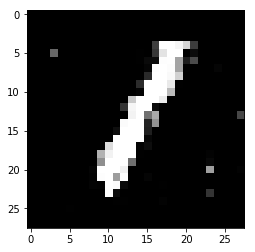

Number batches 78
66(0/78) D: 0.3665, G: 1.3492
66(1/78) D: 0.4179, G: 2.9538
66(2/78) D: 0.4026, G: 1.7208
66(3/78) D: 0.3563, G: 1.5469
66(4/78) D: 0.3833, G: 1.9237
66(5/78) D: 0.2971, G: 1.8504
66(6/78) D: 0.3172, G: 2.3464
66(7/78) D: 0.3003, G: 1.8911
66(8/78) D: 0.3504, G: 1.6668
66(9/78) D: 0.4091, G: 2.9655
66(10/78) D: 0.3893, G: 2.0014
66(11/78) D: 0.3147, G: 1.8853
66(12/78) D: 0.2747, G: 2.1746
66(13/78) D: 0.3074, G: 2.2531
66(14/78) D: 0.3617, G: 2.1664
66(15/78) D: 0.2978, G: 2.0742
66(16/78) D: 0.2880, G: 2.1465
66(17/78) D: 0.2180, G: 2.4853
66(18/78) D: 0.3095, G: 1.3874
66(19/78) D: 0.3271, G: 3.2393
66(20/78) D: 0.3764, G: 1.5947
66(21/78) D: 0.3915, G: 2.4002
66(22/78) D: 0.3273, G: 2.3161
66(23/78) D: 0.3090, G: 1.4667
66(24/78) D: 0.3268, G: 2.3140
66(25/78) D: 0.3060, G: 2.5178
66(26/78) D: 0.3246, G: 1.4870
66(27/78) D: 0.3454, G: 2.6678
66(28/78) D: 0.2384, G: 2.0643
66(29/78) D: 0.3074, G: 1.8485
66(30/78) D: 0.2913, G: 2.1464
66(31/78) D: 0.2824, G: 2.6228


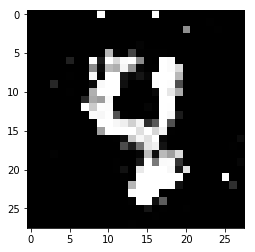

Number batches 78
67(0/78) D: 0.3884, G: 1.9487
67(1/78) D: 0.3353, G: 2.0497
67(2/78) D: 0.3071, G: 1.5285
67(3/78) D: 0.3119, G: 2.1774
67(4/78) D: 0.3735, G: 1.8300
67(5/78) D: 0.2895, G: 2.2870
67(6/78) D: 0.3243, G: 1.7491
67(7/78) D: 0.3221, G: 2.5080
67(8/78) D: 0.3910, G: 1.2595
67(9/78) D: 0.4391, G: 2.5992
67(10/78) D: 0.3929, G: 1.4110
67(11/78) D: 0.4138, G: 2.5416
67(12/78) D: 0.3575, G: 1.6123
67(13/78) D: 0.3297, G: 1.8095
67(14/78) D: 0.3970, G: 1.7572
67(15/78) D: 0.3340, G: 1.9530
67(16/78) D: 0.3179, G: 2.2166
67(17/78) D: 0.3284, G: 2.1561
67(18/78) D: 0.3011, G: 1.9180
67(19/78) D: 0.2742, G: 2.2395
67(20/78) D: 0.2768, G: 1.9637
67(21/78) D: 0.3373, G: 1.8441
67(22/78) D: 0.2967, G: 1.9095
67(23/78) D: 0.3113, G: 2.0982
67(24/78) D: 0.3228, G: 1.6449
67(25/78) D: 0.3461, G: 2.3823
67(26/78) D: 0.3798, G: 1.8033
67(27/78) D: 0.3368, G: 2.5985
67(28/78) D: 0.2354, G: 2.3129
67(29/78) D: 0.2878, G: 1.9985
67(30/78) D: 0.3472, G: 2.4818
67(31/78) D: 0.2935, G: 1.5565


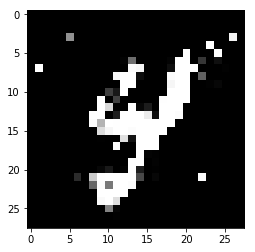

Number batches 78
68(0/78) D: 0.3564, G: 1.6419
68(1/78) D: 0.3157, G: 1.9149
68(2/78) D: 0.3246, G: 1.9643
68(3/78) D: 0.3553, G: 2.2539
68(4/78) D: 0.3290, G: 1.5863
68(5/78) D: 0.3013, G: 2.3459
68(6/78) D: 0.3045, G: 1.7157
68(7/78) D: 0.2617, G: 2.1272
68(8/78) D: 0.4167, G: 1.6120
68(9/78) D: 0.3300, G: 2.1416
68(10/78) D: 0.3662, G: 2.5205
68(11/78) D: 0.2951, G: 1.5162
68(12/78) D: 0.3096, G: 2.2847
68(13/78) D: 0.2787, G: 2.2120
68(14/78) D: 0.3527, G: 1.3999
68(15/78) D: 0.3701, G: 3.0279
68(16/78) D: 0.3250, G: 1.6425
68(17/78) D: 0.2935, G: 2.6403
68(18/78) D: 0.3927, G: 1.6732
68(19/78) D: 0.3067, G: 1.8479
68(20/78) D: 0.2828, G: 2.0027
68(21/78) D: 0.2895, G: 1.9895
68(22/78) D: 0.3194, G: 1.8785
68(23/78) D: 0.2945, G: 2.6510
68(24/78) D: 0.3272, G: 1.4092
68(25/78) D: 0.2773, G: 2.4930
68(26/78) D: 0.3787, G: 1.4898
68(27/78) D: 0.3587, G: 2.1827
68(28/78) D: 0.3281, G: 2.5207
68(29/78) D: 0.3934, G: 1.4934
68(30/78) D: 0.3541, G: 2.1040
68(31/78) D: 0.3221, G: 2.3842


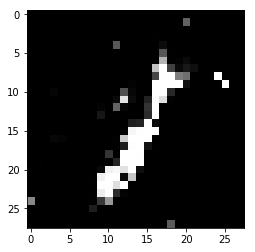

Number batches 78
69(0/78) D: 0.4273, G: 1.3045
69(1/78) D: 0.3877, G: 2.5966
69(2/78) D: 0.3999, G: 1.4343
69(3/78) D: 0.4235, G: 2.5327
69(4/78) D: 0.3812, G: 1.5124
69(5/78) D: 0.3196, G: 1.8661
69(6/78) D: 0.2749, G: 2.1657
69(7/78) D: 0.2535, G: 1.8914
69(8/78) D: 0.3511, G: 1.0427
69(9/78) D: 0.4650, G: 2.8332
69(10/78) D: 0.4147, G: 2.1194
69(11/78) D: 0.3452, G: 1.7198
69(12/78) D: 0.3103, G: 2.0846
69(13/78) D: 0.3550, G: 2.1262
69(14/78) D: 0.3246, G: 1.7625
69(15/78) D: 0.3130, G: 1.9013
69(16/78) D: 0.2950, G: 2.1847
69(17/78) D: 0.2802, G: 2.0223
69(18/78) D: 0.3259, G: 1.9254
69(19/78) D: 0.3189, G: 2.1050
69(20/78) D: 0.3185, G: 2.3367
69(21/78) D: 0.3535, G: 1.4908
69(22/78) D: 0.3367, G: 2.1761
69(23/78) D: 0.3009, G: 2.0835
69(24/78) D: 0.2956, G: 1.6498
69(25/78) D: 0.3139, G: 2.2324
69(26/78) D: 0.3457, G: 1.8796
69(27/78) D: 0.4007, G: 2.1662
69(28/78) D: 0.2976, G: 2.4939
69(29/78) D: 0.3499, G: 1.3447
69(30/78) D: 0.3442, G: 2.2501
69(31/78) D: 0.2698, G: 1.8524


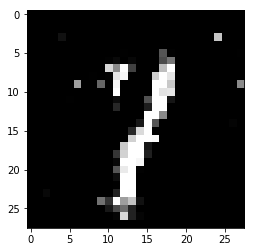

Number batches 78
70(0/78) D: 0.4025, G: 1.9445
70(1/78) D: 0.3733, G: 1.9046
70(2/78) D: 0.3483, G: 1.6016
70(3/78) D: 0.3308, G: 1.7619
70(4/78) D: 0.3122, G: 1.9435
70(5/78) D: 0.2747, G: 1.8438
70(6/78) D: 0.2756, G: 1.9871
70(7/78) D: 0.2871, G: 2.4701
70(8/78) D: 0.3706, G: 1.3167
70(9/78) D: 0.4195, G: 2.4907
70(10/78) D: 0.3904, G: 1.5379
70(11/78) D: 0.3409, G: 2.3388
70(12/78) D: 0.3280, G: 1.9516
70(13/78) D: 0.3232, G: 1.5699
70(14/78) D: 0.3851, G: 2.7941
70(15/78) D: 0.3862, G: 1.6406
70(16/78) D: 0.3000, G: 1.7498
70(17/78) D: 0.2616, G: 2.4044
70(18/78) D: 0.3136, G: 1.4601
70(19/78) D: 0.3307, G: 2.5446
70(20/78) D: 0.2522, G: 2.1679
70(21/78) D: 0.2898, G: 1.7438
70(22/78) D: 0.3795, G: 2.1242
70(23/78) D: 0.3197, G: 1.7379
70(24/78) D: 0.2752, G: 2.2962
70(25/78) D: 0.2741, G: 1.5563
70(26/78) D: 0.3788, G: 2.9200
70(27/78) D: 0.3907, G: 1.2456
70(28/78) D: 0.3788, G: 2.8052
70(29/78) D: 0.4314, G: 1.5946
70(30/78) D: 0.3384, G: 1.6903
70(31/78) D: 0.3095, G: 2.0793


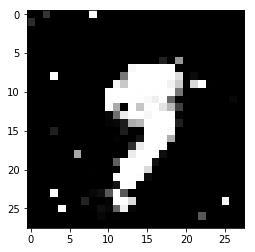

Number batches 78
71(0/78) D: 0.3177, G: 2.2336
71(1/78) D: 0.3138, G: 1.6575
71(2/78) D: 0.4094, G: 2.4351
71(3/78) D: 0.3453, G: 1.7501
71(4/78) D: 0.3459, G: 2.3159
71(5/78) D: 0.2859, G: 2.3215
71(6/78) D: 0.2846, G: 2.3352
71(7/78) D: 0.2474, G: 2.1179
71(8/78) D: 0.3152, G: 1.3185
71(9/78) D: 0.4463, G: 2.6355
71(10/78) D: 0.3389, G: 2.0237
71(11/78) D: 0.2912, G: 1.9394
71(12/78) D: 0.3716, G: 2.6097
71(13/78) D: 0.3573, G: 1.9586
71(14/78) D: 0.2904, G: 1.6848
71(15/78) D: 0.3087, G: 2.0931
71(16/78) D: 0.3268, G: 2.0065
71(17/78) D: 0.2909, G: 2.0129
71(18/78) D: 0.3315, G: 1.8048
71(19/78) D: 0.3317, G: 2.2212
71(20/78) D: 0.3020, G: 2.3733
71(21/78) D: 0.3599, G: 1.6342
71(22/78) D: 0.3503, G: 2.1767
71(23/78) D: 0.3190, G: 2.1589
71(24/78) D: 0.3092, G: 1.6784
71(25/78) D: 0.3506, G: 2.1713
71(26/78) D: 0.4275, G: 1.8754
71(27/78) D: 0.3547, G: 1.7933
71(28/78) D: 0.3571, G: 1.9642
71(29/78) D: 0.3217, G: 1.7058
71(30/78) D: 0.3764, G: 1.8556
71(31/78) D: 0.3803, G: 1.6212


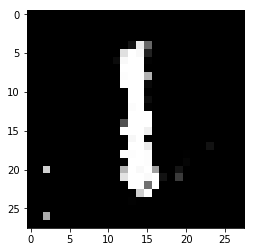

Number batches 78
72(0/78) D: 0.3170, G: 1.6936
72(1/78) D: 0.3298, G: 2.0454
72(2/78) D: 0.2950, G: 2.0162
72(3/78) D: 0.3661, G: 1.8735
72(4/78) D: 0.2959, G: 2.0562
72(5/78) D: 0.3021, G: 2.3551
72(6/78) D: 0.3300, G: 1.7354
72(7/78) D: 0.3377, G: 2.7511
72(8/78) D: 0.4011, G: 1.2898
72(9/78) D: 0.4357, G: 2.6204
72(10/78) D: 0.4048, G: 1.6309
72(11/78) D: 0.3012, G: 1.7084
72(12/78) D: 0.3209, G: 2.3086
72(13/78) D: 0.3253, G: 1.8243
72(14/78) D: 0.3190, G: 1.9489
72(15/78) D: 0.3381, G: 2.0754
72(16/78) D: 0.3134, G: 1.8113
72(17/78) D: 0.2688, G: 2.3679
72(18/78) D: 0.3583, G: 1.7242
72(19/78) D: 0.2617, G: 2.1495
72(20/78) D: 0.2815, G: 2.0113
72(21/78) D: 0.3462, G: 1.7888
72(22/78) D: 0.3649, G: 2.4862
72(23/78) D: 0.2484, G: 1.8532
72(24/78) D: 0.2731, G: 1.5734
72(25/78) D: 0.3489, G: 2.6844
72(26/78) D: 0.3830, G: 1.2896
72(27/78) D: 0.4411, G: 3.0840
72(28/78) D: 0.3770, G: 1.6705
72(29/78) D: 0.3868, G: 2.0991
72(30/78) D: 0.3655, G: 1.9332
72(31/78) D: 0.3157, G: 1.8176


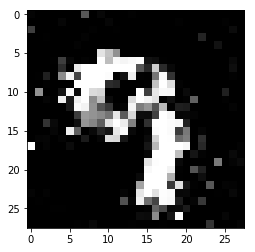

Number batches 78
73(0/78) D: 0.3499, G: 1.8852
73(1/78) D: 0.3333, G: 2.7402
73(2/78) D: 0.3458, G: 1.6356
73(3/78) D: 0.3480, G: 1.9455
73(4/78) D: 0.3041, G: 1.8186
73(5/78) D: 0.3365, G: 2.3135
73(6/78) D: 0.3156, G: 2.1727
73(7/78) D: 0.2882, G: 2.2207
73(8/78) D: 0.3697, G: 1.8207
73(9/78) D: 0.3784, G: 2.1525
73(10/78) D: 0.3524, G: 1.8105
73(11/78) D: 0.3746, G: 2.3073
73(12/78) D: 0.3498, G: 1.4967
73(13/78) D: 0.3618, G: 2.4019
73(14/78) D: 0.3197, G: 2.0717
73(15/78) D: 0.3446, G: 1.4794
73(16/78) D: 0.3590, G: 2.3406
73(17/78) D: 0.3157, G: 1.8861
73(18/78) D: 0.3564, G: 1.9375
73(19/78) D: 0.2633, G: 2.3870
73(20/78) D: 0.3925, G: 2.1175
73(21/78) D: 0.3272, G: 1.7728
73(22/78) D: 0.3114, G: 2.0906
73(23/78) D: 0.2868, G: 1.9881
73(24/78) D: 0.3144, G: 1.8703
73(25/78) D: 0.3201, G: 2.6954
73(26/78) D: 0.3523, G: 1.9292
73(27/78) D: 0.3050, G: 1.8507
73(28/78) D: 0.3253, G: 2.6497
73(29/78) D: 0.3431, G: 1.8255
73(30/78) D: 0.3237, G: 1.5776
73(31/78) D: 0.3776, G: 2.6196


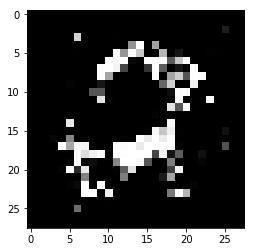

Number batches 78
74(0/78) D: 0.3972, G: 1.9256
74(1/78) D: 0.3622, G: 1.7548
74(2/78) D: 0.3425, G: 2.0310
74(3/78) D: 0.3364, G: 2.0515
74(4/78) D: 0.3146, G: 1.8140
74(5/78) D: 0.3090, G: 2.0298
74(6/78) D: 0.2872, G: 2.1004
74(7/78) D: 0.2882, G: 2.0042
74(8/78) D: 0.3780, G: 1.2006
74(9/78) D: 0.4798, G: 2.3359
74(10/78) D: 0.3759, G: 1.2856
74(11/78) D: 0.3742, G: 2.3608
74(12/78) D: 0.3673, G: 2.0476
74(13/78) D: 0.2988, G: 1.6004
74(14/78) D: 0.3142, G: 2.1100
74(15/78) D: 0.3381, G: 1.7296
74(16/78) D: 0.2849, G: 2.2740
74(17/78) D: 0.2664, G: 1.9905
74(18/78) D: 0.3343, G: 1.6217
74(19/78) D: 0.3070, G: 1.9336
74(20/78) D: 0.3038, G: 2.6056
74(21/78) D: 0.4426, G: 1.3718
74(22/78) D: 0.3907, G: 2.2926
74(23/78) D: 0.3375, G: 1.5547
74(24/78) D: 0.3011, G: 1.5338
74(25/78) D: 0.3452, G: 2.1068
74(26/78) D: 0.3202, G: 1.6900
74(27/78) D: 0.3557, G: 1.5909
74(28/78) D: 0.3488, G: 2.8537
74(29/78) D: 0.4221, G: 1.1123
74(30/78) D: 0.4610, G: 2.8629
74(31/78) D: 0.4946, G: 1.4913


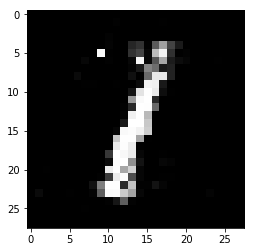

Number batches 78
75(0/78) D: 0.4350, G: 2.3693
75(1/78) D: 0.3162, G: 2.0154
75(2/78) D: 0.3222, G: 1.8020
75(3/78) D: 0.3330, G: 2.4026
75(4/78) D: 0.3836, G: 1.2947
75(5/78) D: 0.3669, G: 2.5970
75(6/78) D: 0.2953, G: 2.2146
75(7/78) D: 0.2982, G: 2.0251
75(8/78) D: 0.3678, G: 1.8050
75(9/78) D: 0.3880, G: 1.6765
75(10/78) D: 0.3341, G: 1.9536
75(11/78) D: 0.3072, G: 2.1532
75(12/78) D: 0.3602, G: 1.4954
75(13/78) D: 0.3995, G: 2.6914
75(14/78) D: 0.4140, G: 1.3303
75(15/78) D: 0.4743, G: 2.3304
75(16/78) D: 0.3571, G: 1.6219
75(17/78) D: 0.3276, G: 1.6185
75(18/78) D: 0.3809, G: 2.2052
75(19/78) D: 0.3981, G: 1.6870
75(20/78) D: 0.3040, G: 1.8779
75(21/78) D: 0.3613, G: 1.8094
75(22/78) D: 0.3357, G: 1.6796
75(23/78) D: 0.3376, G: 1.6757
75(24/78) D: 0.3498, G: 2.3486
75(25/78) D: 0.3322, G: 1.5603
75(26/78) D: 0.4909, G: 3.6677
75(27/78) D: 0.6606, G: 0.5619
75(28/78) D: 0.6688, G: 2.6595
75(29/78) D: 0.5322, G: 2.0132
75(30/78) D: 0.4040, G: 1.2600
75(31/78) D: 0.3903, G: 1.4344


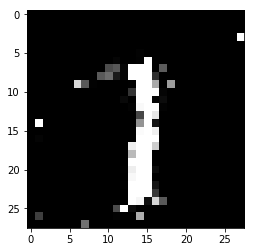

Number batches 78
76(0/78) D: 0.4199, G: 2.4563
76(1/78) D: 0.3644, G: 1.7484
76(2/78) D: 0.3373, G: 2.1019
76(3/78) D: 0.3635, G: 1.7796
76(4/78) D: 0.4069, G: 1.6394
76(5/78) D: 0.3396, G: 1.9857
76(6/78) D: 0.3126, G: 2.1777
76(7/78) D: 0.2972, G: 1.7486
76(8/78) D: 0.3599, G: 2.1307
76(9/78) D: 0.4101, G: 1.7159
76(10/78) D: 0.3268, G: 2.1665
76(11/78) D: 0.3012, G: 2.1021
76(12/78) D: 0.3329, G: 2.3241
76(13/78) D: 0.3539, G: 1.4484
76(14/78) D: 0.3386, G: 2.1050
76(15/78) D: 0.3500, G: 2.2107
76(16/78) D: 0.2810, G: 2.1105
76(17/78) D: 0.3243, G: 2.1059
76(18/78) D: 0.3315, G: 1.4956
76(19/78) D: 0.3688, G: 2.4786
76(20/78) D: 0.3173, G: 1.4305
76(21/78) D: 0.4362, G: 2.7274
76(22/78) D: 0.3675, G: 1.6379
76(23/78) D: 0.3359, G: 2.1907
76(24/78) D: 0.3672, G: 1.7888
76(25/78) D: 0.3367, G: 2.0296
76(26/78) D: 0.3388, G: 2.1388
76(27/78) D: 0.3930, G: 1.6393
76(28/78) D: 0.3666, G: 2.9090
76(29/78) D: 0.4363, G: 1.3679
76(30/78) D: 0.3811, G: 1.9464
76(31/78) D: 0.3320, G: 1.9481


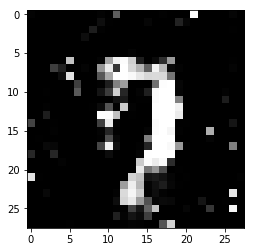

Number batches 78
77(0/78) D: 0.3986, G: 1.8215
77(1/78) D: 0.3405, G: 2.0845
77(2/78) D: 0.3524, G: 1.4726
77(3/78) D: 0.3850, G: 2.2456
77(4/78) D: 0.3942, G: 1.5036
77(5/78) D: 0.3510, G: 2.3954
77(6/78) D: 0.3540, G: 1.8227
77(7/78) D: 0.2837, G: 2.1556
77(8/78) D: 0.3756, G: 1.7236
77(9/78) D: 0.3315, G: 1.9224
77(10/78) D: 0.2903, G: 1.9730
77(11/78) D: 0.2956, G: 2.3200
77(12/78) D: 0.3308, G: 2.0617
77(13/78) D: 0.3402, G: 1.9763
77(14/78) D: 0.3189, G: 1.8268
77(15/78) D: 0.3626, G: 2.3723
77(16/78) D: 0.3490, G: 1.7263
77(17/78) D: 0.3495, G: 1.6984
77(18/78) D: 0.3893, G: 1.9860
77(19/78) D: 0.3189, G: 1.9520
77(20/78) D: 0.2931, G: 1.8925
77(21/78) D: 0.3956, G: 1.7426
77(22/78) D: 0.3559, G: 2.3439
77(23/78) D: 0.3515, G: 1.3652
77(24/78) D: 0.3520, G: 1.9424
77(25/78) D: 0.3422, G: 1.5563
77(26/78) D: 0.3355, G: 2.1531
77(27/78) D: 0.3403, G: 1.5407
77(28/78) D: 0.3368, G: 2.8582
77(29/78) D: 0.4671, G: 1.3158
77(30/78) D: 0.4310, G: 2.3485
77(31/78) D: 0.3799, G: 2.1037


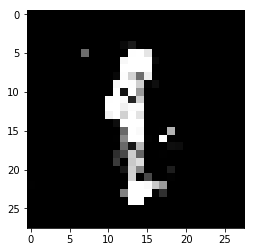

Number batches 78
78(0/78) D: 0.4486, G: 2.1307
78(1/78) D: 0.3654, G: 1.8430
78(2/78) D: 0.3456, G: 1.4398
78(3/78) D: 0.3945, G: 1.9319
78(4/78) D: 0.3519, G: 1.8360
78(5/78) D: 0.3185, G: 1.9320
78(6/78) D: 0.2979, G: 1.9121
78(7/78) D: 0.2878, G: 1.9307
78(8/78) D: 0.3907, G: 1.5257
78(9/78) D: 0.4581, G: 2.3171
78(10/78) D: 0.4174, G: 1.4523
78(11/78) D: 0.3350, G: 1.9010
78(12/78) D: 0.3850, G: 1.6561
78(13/78) D: 0.4240, G: 1.9944
78(14/78) D: 0.3369, G: 2.0393
78(15/78) D: 0.4203, G: 1.6168
78(16/78) D: 0.3412, G: 2.3976
78(17/78) D: 0.3165, G: 2.0678
78(18/78) D: 0.3774, G: 1.4761
78(19/78) D: 0.3176, G: 1.8379
78(20/78) D: 0.3570, G: 2.4501
78(21/78) D: 0.3708, G: 1.2568
78(22/78) D: 0.4440, G: 2.0763
78(23/78) D: 0.3947, G: 1.7350
78(24/78) D: 0.3705, G: 2.0103
78(25/78) D: 0.3408, G: 1.4600
78(26/78) D: 0.4039, G: 1.9305
78(27/78) D: 0.3650, G: 1.6232
78(28/78) D: 0.3311, G: 1.7743
78(29/78) D: 0.3555, G: 1.9596
78(30/78) D: 0.3578, G: 1.5546
78(31/78) D: 0.4249, G: 2.1142


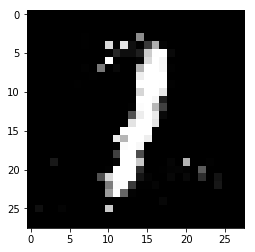

Number batches 78
79(0/78) D: 0.3661, G: 1.8043
79(1/78) D: 0.4016, G: 1.7699
79(2/78) D: 0.3704, G: 1.3670
79(3/78) D: 0.3851, G: 1.9742
79(4/78) D: 0.3816, G: 1.2600
79(5/78) D: 0.3533, G: 2.0040
79(6/78) D: 0.3845, G: 1.8207
79(7/78) D: 0.3093, G: 1.8047
79(8/78) D: 0.3887, G: 2.0016
79(9/78) D: 0.4409, G: 1.5701
79(10/78) D: 0.3603, G: 1.7841
79(11/78) D: 0.3506, G: 2.4549
79(12/78) D: 0.3823, G: 1.3611
79(13/78) D: 0.4153, G: 2.2481
79(14/78) D: 0.4137, G: 1.2301
79(15/78) D: 0.4208, G: 2.4038
79(16/78) D: 0.3611, G: 1.7718
79(17/78) D: 0.3511, G: 1.8725
79(18/78) D: 0.4062, G: 2.0803
79(19/78) D: 0.3532, G: 1.6491
79(20/78) D: 0.3293, G: 1.8353
79(21/78) D: 0.4121, G: 1.4464
79(22/78) D: 0.3901, G: 1.9733
79(23/78) D: 0.3352, G: 2.4414
79(24/78) D: 0.3469, G: 1.4107
79(25/78) D: 0.4209, G: 2.5325
79(26/78) D: 0.4362, G: 1.2976
79(27/78) D: 0.4349, G: 2.3235
79(28/78) D: 0.3927, G: 1.5776
79(29/78) D: 0.3602, G: 1.6741
79(30/78) D: 0.3545, G: 1.7739
79(31/78) D: 0.3366, G: 1.8744


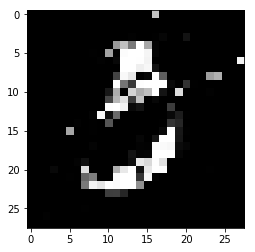

Number batches 78
80(0/78) D: 0.4104, G: 1.6569
80(1/78) D: 0.3667, G: 2.6757
80(2/78) D: 0.4349, G: 1.1237
80(3/78) D: 0.3583, G: 1.5468
80(4/78) D: 0.3135, G: 2.1393
80(5/78) D: 0.3476, G: 1.5160
80(6/78) D: 0.3702, G: 2.2443
80(7/78) D: 0.3256, G: 1.8307
80(8/78) D: 0.3504, G: 1.1890
80(9/78) D: 0.4376, G: 2.1211
80(10/78) D: 0.3800, G: 1.5613
80(11/78) D: 0.3191, G: 2.4382
80(12/78) D: 0.4161, G: 1.4331
80(13/78) D: 0.3349, G: 1.6960
80(14/78) D: 0.3700, G: 1.8884
80(15/78) D: 0.4220, G: 1.2868
80(16/78) D: 0.3545, G: 2.4803
80(17/78) D: 0.3593, G: 1.6911
80(18/78) D: 0.4178, G: 1.9780
80(19/78) D: 0.3397, G: 2.0811
80(20/78) D: 0.3131, G: 2.0658
80(21/78) D: 0.3675, G: 1.4501
80(22/78) D: 0.4283, G: 2.2680
80(23/78) D: 0.4285, G: 1.7936
80(24/78) D: 0.3395, G: 1.6477
80(25/78) D: 0.3526, G: 1.4733
80(26/78) D: 0.4059, G: 2.1266
80(27/78) D: 0.3885, G: 1.7221
80(28/78) D: 0.3297, G: 2.0725
80(29/78) D: 0.4565, G: 2.0560
80(30/78) D: 0.3850, G: 1.3846
80(31/78) D: 0.4397, G: 2.3433


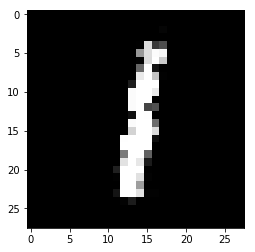

Number batches 78
81(0/78) D: 0.4020, G: 1.6798
81(1/78) D: 0.3246, G: 2.2989
81(2/78) D: 0.3544, G: 1.4588
81(3/78) D: 0.4089, G: 2.3480
81(4/78) D: 0.3478, G: 1.6743
81(5/78) D: 0.3378, G: 1.6938
81(6/78) D: 0.3501, G: 2.1208
81(7/78) D: 0.3655, G: 1.6299
81(8/78) D: 0.4061, G: 1.5356
81(9/78) D: 0.4260, G: 1.9773
81(10/78) D: 0.4558, G: 1.3240
81(11/78) D: 0.3785, G: 2.1340
81(12/78) D: 0.3747, G: 1.3961
81(13/78) D: 0.3762, G: 1.5123
81(14/78) D: 0.3505, G: 1.9443
81(15/78) D: 0.3621, G: 1.5623
81(16/78) D: 0.3427, G: 2.2115
81(17/78) D: 0.2946, G: 1.8001
81(18/78) D: 0.3941, G: 1.5480
81(19/78) D: 0.2876, G: 1.9059
81(20/78) D: 0.3131, G: 2.2006
81(21/78) D: 0.3981, G: 1.7353
81(22/78) D: 0.3883, G: 1.7228
81(23/78) D: 0.3419, G: 2.4272
81(24/78) D: 0.3817, G: 1.3726
81(25/78) D: 0.3932, G: 2.3854
81(26/78) D: 0.3687, G: 1.5286
81(27/78) D: 0.4677, G: 2.5776
81(28/78) D: 0.3965, G: 1.3213
81(29/78) D: 0.4209, G: 1.8646
81(30/78) D: 0.3959, G: 1.9139
81(31/78) D: 0.3574, G: 1.5691


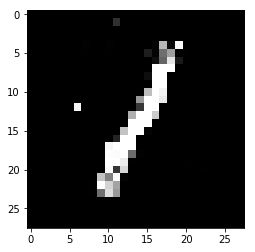

Number batches 78
82(0/78) D: 0.4218, G: 1.4745
82(1/78) D: 0.3894, G: 1.7963
82(2/78) D: 0.3618, G: 1.8277
82(3/78) D: 0.3200, G: 1.8234
82(4/78) D: 0.3282, G: 1.9279
82(5/78) D: 0.3232, G: 1.8788
82(6/78) D: 0.3544, G: 1.5700
82(7/78) D: 0.3696, G: 2.7631
82(8/78) D: 0.5154, G: 1.0191
82(9/78) D: 0.5273, G: 1.8373
82(10/78) D: 0.3814, G: 1.8157
82(11/78) D: 0.3321, G: 1.8827
82(12/78) D: 0.3704, G: 1.7626
82(13/78) D: 0.3650, G: 1.7315
82(14/78) D: 0.3586, G: 2.2582
82(15/78) D: 0.3680, G: 1.3324
82(16/78) D: 0.3712, G: 2.0645
82(17/78) D: 0.2891, G: 1.9940
82(18/78) D: 0.3315, G: 2.0395
82(19/78) D: 0.3081, G: 2.0382
82(20/78) D: 0.3198, G: 1.9845
82(21/78) D: 0.3828, G: 1.7555
82(22/78) D: 0.3493, G: 1.8252
82(23/78) D: 0.3020, G: 1.9422
82(24/78) D: 0.3256, G: 2.0241
82(25/78) D: 0.3240, G: 1.9286
82(26/78) D: 0.3610, G: 1.7577
82(27/78) D: 0.3699, G: 2.2431
82(28/78) D: 0.3267, G: 1.9347
82(29/78) D: 0.3656, G: 1.7353
82(30/78) D: 0.3942, G: 1.7090
82(31/78) D: 0.3681, G: 2.0388


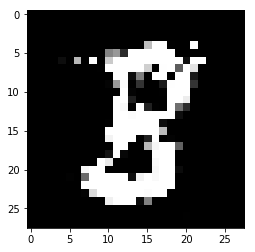

Number batches 78
83(0/78) D: 0.4082, G: 1.9472
83(1/78) D: 0.3315, G: 1.5341
83(2/78) D: 0.3522, G: 1.8347
83(3/78) D: 0.3793, G: 1.8352
83(4/78) D: 0.3322, G: 1.7750
83(5/78) D: 0.3487, G: 2.1388
83(6/78) D: 0.3514, G: 1.9304
83(7/78) D: 0.2944, G: 1.8613
83(8/78) D: 0.3579, G: 1.3186
83(9/78) D: 0.4356, G: 2.5252
83(10/78) D: 0.4440, G: 1.4802
83(11/78) D: 0.4213, G: 2.2186
83(12/78) D: 0.3802, G: 1.7932
83(13/78) D: 0.3777, G: 1.4484
83(14/78) D: 0.3557, G: 1.7397
83(15/78) D: 0.3763, G: 1.8616
83(16/78) D: 0.3583, G: 2.1125
83(17/78) D: 0.3133, G: 2.2907
83(18/78) D: 0.4411, G: 1.4792
83(19/78) D: 0.3661, G: 1.9517
83(20/78) D: 0.3405, G: 1.8170
83(21/78) D: 0.3430, G: 1.4824
83(22/78) D: 0.3789, G: 1.7738
83(23/78) D: 0.3606, G: 2.3332
83(24/78) D: 0.2908, G: 1.6510
83(25/78) D: 0.3363, G: 1.9143
83(26/78) D: 0.3706, G: 2.4950
83(27/78) D: 0.3991, G: 1.1176
83(28/78) D: 0.4433, G: 2.5941
83(29/78) D: 0.4188, G: 1.5878
83(30/78) D: 0.3820, G: 1.1263
83(31/78) D: 0.3981, G: 2.0769


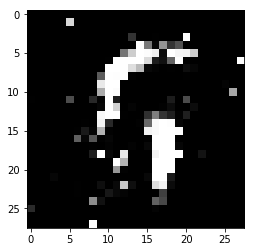

Number batches 78
84(0/78) D: 0.4268, G: 1.5022
84(1/78) D: 0.3515, G: 1.9515
84(2/78) D: 0.3215, G: 1.9091
84(3/78) D: 0.2972, G: 1.7697
84(4/78) D: 0.3029, G: 1.8826
84(5/78) D: 0.3150, G: 1.7038
84(6/78) D: 0.3221, G: 1.9453
84(7/78) D: 0.2928, G: 2.0620
84(8/78) D: 0.4099, G: 1.3790
84(9/78) D: 0.4463, G: 2.2446
84(10/78) D: 0.4209, G: 1.5629
84(11/78) D: 0.3404, G: 2.0592
84(12/78) D: 0.3555, G: 2.1073
84(13/78) D: 0.3537, G: 1.7981
84(14/78) D: 0.4059, G: 1.6324
84(15/78) D: 0.3909, G: 2.1302
84(16/78) D: 0.3380, G: 1.7984
84(17/78) D: 0.2938, G: 1.8506
84(18/78) D: 0.4030, G: 1.7439
84(19/78) D: 0.3338, G: 1.7286
84(20/78) D: 0.3036, G: 2.1847
84(21/78) D: 0.3923, G: 1.1867
84(22/78) D: 0.5058, G: 2.6887
84(23/78) D: 0.4257, G: 1.7193
84(24/78) D: 0.3472, G: 1.4173
84(25/78) D: 0.3340, G: 2.3441
84(26/78) D: 0.4220, G: 1.6075
84(27/78) D: 0.3794, G: 1.4865
84(28/78) D: 0.3464, G: 2.1244
84(29/78) D: 0.3970, G: 1.7468
84(30/78) D: 0.3863, G: 1.2966
84(31/78) D: 0.4532, G: 2.1478


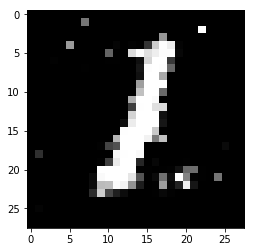

Number batches 78
85(0/78) D: 0.4085, G: 1.4105
85(1/78) D: 0.4152, G: 2.5994
85(2/78) D: 0.4007, G: 1.4170
85(3/78) D: 0.4125, G: 1.7599
85(4/78) D: 0.3108, G: 2.0524
85(5/78) D: 0.3194, G: 1.6751
85(6/78) D: 0.3251, G: 2.1063
85(7/78) D: 0.3037, G: 2.1299
85(8/78) D: 0.4052, G: 1.1600
85(9/78) D: 0.5059, G: 2.3748
85(10/78) D: 0.3782, G: 1.7863
85(11/78) D: 0.3598, G: 1.4498
85(12/78) D: 0.3863, G: 2.0357
85(13/78) D: 0.3845, G: 1.6375
85(14/78) D: 0.3302, G: 1.5875
85(15/78) D: 0.3780, G: 1.8831
85(16/78) D: 0.3198, G: 1.8803
85(17/78) D: 0.2857, G: 1.7151
85(18/78) D: 0.3576, G: 1.7716
85(19/78) D: 0.3139, G: 2.1542
85(20/78) D: 0.3001, G: 1.5850
85(21/78) D: 0.3629, G: 1.7335
85(22/78) D: 0.3264, G: 1.9303
85(23/78) D: 0.3092, G: 1.9770
85(24/78) D: 0.2765, G: 1.7827
85(25/78) D: 0.2927, G: 1.8115
85(26/78) D: 0.3918, G: 1.8511
85(27/78) D: 0.3749, G: 2.3606
85(28/78) D: 0.3359, G: 1.9370
85(29/78) D: 0.3084, G: 1.8244
85(30/78) D: 0.3726, G: 1.6389
85(31/78) D: 0.3328, G: 1.6664


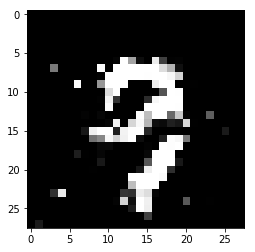

Number batches 78
86(0/78) D: 0.3781, G: 1.5606
86(1/78) D: 0.3622, G: 1.9730
86(2/78) D: 0.3541, G: 1.7237
86(3/78) D: 0.3512, G: 1.5215
86(4/78) D: 0.3793, G: 2.1740
86(5/78) D: 0.3835, G: 1.4254
86(6/78) D: 0.3374, G: 2.2986
86(7/78) D: 0.3464, G: 2.0396
86(8/78) D: 0.3936, G: 1.0965
86(9/78) D: 0.4339, G: 2.4775
86(10/78) D: 0.4207, G: 1.7366
86(11/78) D: 0.3999, G: 2.1361
86(12/78) D: 0.3453, G: 1.7124
86(13/78) D: 0.3600, G: 1.3571
86(14/78) D: 0.3847, G: 2.3994
86(15/78) D: 0.4245, G: 1.5400
86(16/78) D: 0.3588, G: 1.5982
86(17/78) D: 0.3179, G: 2.1294
86(18/78) D: 0.3612, G: 1.9825
86(19/78) D: 0.3268, G: 1.8789
86(20/78) D: 0.3371, G: 2.0765
86(21/78) D: 0.4161, G: 1.7133
86(22/78) D: 0.3820, G: 1.8684
86(23/78) D: 0.3590, G: 2.0439
86(24/78) D: 0.3792, G: 1.4954
86(25/78) D: 0.3955, G: 2.2894
86(26/78) D: 0.3739, G: 1.3728
86(27/78) D: 0.4125, G: 2.2183
86(28/78) D: 0.3019, G: 1.7709
86(29/78) D: 0.3337, G: 2.2079
86(30/78) D: 0.4307, G: 1.4120
86(31/78) D: 0.3902, G: 2.0128


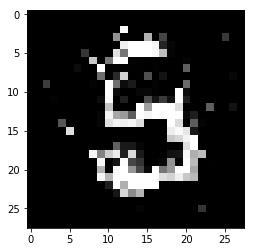

Number batches 78
87(0/78) D: 0.3990, G: 1.6757
87(1/78) D: 0.4229, G: 2.0277
87(2/78) D: 0.3730, G: 1.6483
87(3/78) D: 0.3771, G: 1.7676
87(4/78) D: 0.3733, G: 2.2184
87(5/78) D: 0.3623, G: 1.4552
87(6/78) D: 0.3800, G: 2.3345
87(7/78) D: 0.3194, G: 1.7350
87(8/78) D: 0.3951, G: 1.1599
87(9/78) D: 0.5180, G: 2.4102
87(10/78) D: 0.5010, G: 1.1369
87(11/78) D: 0.3947, G: 1.9255
87(12/78) D: 0.3282, G: 1.9629
87(13/78) D: 0.4029, G: 1.4903
87(14/78) D: 0.3497, G: 1.8388
87(15/78) D: 0.3997, G: 1.7725
87(16/78) D: 0.3690, G: 1.7837
87(17/78) D: 0.3201, G: 2.5357
87(18/78) D: 0.4513, G: 1.3911
87(19/78) D: 0.3656, G: 2.0199
87(20/78) D: 0.2994, G: 1.9624
87(21/78) D: 0.4386, G: 1.4746
87(22/78) D: 0.4168, G: 2.0175
87(23/78) D: 0.3335, G: 1.7586
87(24/78) D: 0.3862, G: 1.8351
87(25/78) D: 0.3556, G: 1.3476
87(26/78) D: 0.4976, G: 2.6188
87(27/78) D: 0.5052, G: 1.5499
87(28/78) D: 0.3266, G: 1.7059
87(29/78) D: 0.3719, G: 1.7008
87(30/78) D: 0.3332, G: 1.7514
87(31/78) D: 0.3641, G: 1.8607


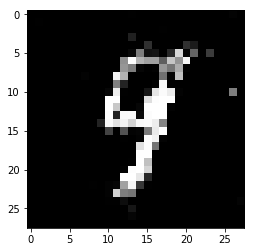

Number batches 78
88(0/78) D: 0.4129, G: 1.5767
88(1/78) D: 0.4029, G: 1.7152
88(2/78) D: 0.3438, G: 2.1472
88(3/78) D: 0.4156, G: 1.4599
88(4/78) D: 0.3947, G: 1.7994
88(5/78) D: 0.3405, G: 2.1483
88(6/78) D: 0.3807, G: 1.5456
88(7/78) D: 0.3881, G: 2.3648
88(8/78) D: 0.5000, G: 1.2327
88(9/78) D: 0.4466, G: 1.5174
88(10/78) D: 0.3871, G: 1.6306
88(11/78) D: 0.4011, G: 1.4721
88(12/78) D: 0.3379, G: 1.9042
88(13/78) D: 0.3125, G: 1.8940
88(14/78) D: 0.3460, G: 1.6207
88(15/78) D: 0.3177, G: 2.0842
88(16/78) D: 0.3698, G: 1.6667
88(17/78) D: 0.2721, G: 2.2785
88(18/78) D: 0.3993, G: 1.3147
88(19/78) D: 0.3903, G: 2.4059
88(20/78) D: 0.3766, G: 1.9964
88(21/78) D: 0.3839, G: 1.1892
88(22/78) D: 0.4061, G: 2.3939
88(23/78) D: 0.3519, G: 1.9568
88(24/78) D: 0.3491, G: 1.5627
88(25/78) D: 0.4320, G: 1.7707
88(26/78) D: 0.3786, G: 2.0187
88(27/78) D: 0.3638, G: 1.6252
88(28/78) D: 0.3382, G: 2.0399
88(29/78) D: 0.3521, G: 1.7610
88(30/78) D: 0.3416, G: 1.8394
88(31/78) D: 0.3919, G: 1.7997


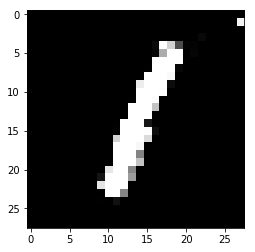

Number batches 78
89(0/78) D: 0.3924, G: 1.6762
89(1/78) D: 0.3601, G: 1.7869
89(2/78) D: 0.3450, G: 1.6028
89(3/78) D: 0.3607, G: 1.5874
89(4/78) D: 0.3278, G: 1.6370
89(5/78) D: 0.3462, G: 2.2703
89(6/78) D: 0.3465, G: 1.5173
89(7/78) D: 0.3389, G: 1.8931
89(8/78) D: 0.4522, G: 1.4683
89(9/78) D: 0.4323, G: 1.5478
89(10/78) D: 0.3825, G: 2.1091
89(11/78) D: 0.4123, G: 0.9586
89(12/78) D: 0.5845, G: 2.5446
89(13/78) D: 0.4896, G: 1.6600
89(14/78) D: 0.3502, G: 1.2222
89(15/78) D: 0.4277, G: 1.8995
89(16/78) D: 0.3555, G: 1.9733
89(17/78) D: 0.3058, G: 1.8462
89(18/78) D: 0.4728, G: 1.4532
89(19/78) D: 0.3520, G: 1.5885
89(20/78) D: 0.3697, G: 2.0119
89(21/78) D: 0.4101, G: 1.5423
89(22/78) D: 0.3676, G: 1.5507
89(23/78) D: 0.3123, G: 1.3812
89(24/78) D: 0.3664, G: 2.0237
89(25/78) D: 0.3736, G: 1.6105
89(26/78) D: 0.4124, G: 1.9499
89(27/78) D: 0.3579, G: 1.6381
89(28/78) D: 0.3913, G: 1.9527
89(29/78) D: 0.4040, G: 2.1975
89(30/78) D: 0.4087, G: 1.0036
89(31/78) D: 0.4347, G: 2.1465


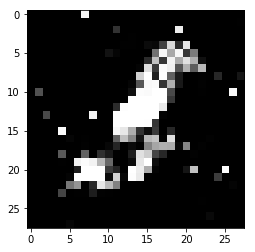

Number batches 78
90(0/78) D: 0.4374, G: 1.1706
90(1/78) D: 0.4180, G: 1.6825
90(2/78) D: 0.3969, G: 1.5583
90(3/78) D: 0.3825, G: 1.4626
90(4/78) D: 0.3511, G: 1.8716
90(5/78) D: 0.3206, G: 1.6784
90(6/78) D: 0.3515, G: 1.5578
90(7/78) D: 0.3785, G: 2.5465
90(8/78) D: 0.5565, G: 0.9082
90(9/78) D: 0.6013, G: 1.9441
90(10/78) D: 0.4473, G: 1.6659
90(11/78) D: 0.3667, G: 1.5053
90(12/78) D: 0.3962, G: 1.6112
90(13/78) D: 0.3964, G: 1.5827
90(14/78) D: 0.3848, G: 1.5550
90(15/78) D: 0.3834, G: 1.7068
90(16/78) D: 0.4169, G: 2.0869
90(17/78) D: 0.3411, G: 1.9163
90(18/78) D: 0.4307, G: 1.3604
90(19/78) D: 0.4170, G: 1.8420
90(20/78) D: 0.3567, G: 1.3604
90(21/78) D: 0.4626, G: 1.8383
90(22/78) D: 0.3790, G: 1.6191
90(23/78) D: 0.4141, G: 2.2223
90(24/78) D: 0.4534, G: 1.6385
90(25/78) D: 0.4487, G: 1.1312
90(26/78) D: 0.4925, G: 2.1345
90(27/78) D: 0.4296, G: 1.8382
90(28/78) D: 0.3549, G: 1.7359
90(29/78) D: 0.3980, G: 1.4419
90(30/78) D: 0.4393, G: 1.5316
90(31/78) D: 0.3707, G: 1.4826


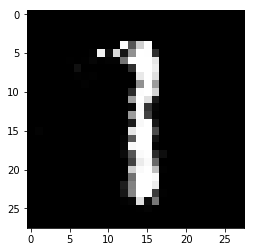

Number batches 78
91(0/78) D: 0.4572, G: 2.0928
91(1/78) D: 0.4426, G: 1.4371
91(2/78) D: 0.4070, G: 1.9055
91(3/78) D: 0.4270, G: 1.9641
91(4/78) D: 0.3887, G: 1.5453
91(5/78) D: 0.3850, G: 1.9025
91(6/78) D: 0.3829, G: 1.2747
91(7/78) D: 0.3933, G: 1.8242
91(8/78) D: 0.4637, G: 1.4813
91(9/78) D: 0.4472, G: 1.3058
91(10/78) D: 0.4599, G: 2.0245
91(11/78) D: 0.4106, G: 1.4275
91(12/78) D: 0.4114, G: 1.7323
91(13/78) D: 0.3971, G: 1.8338
91(14/78) D: 0.4077, G: 1.4546
91(15/78) D: 0.4172, G: 1.3060
91(16/78) D: 0.3960, G: 1.9460
91(17/78) D: 0.3288, G: 2.1134
91(18/78) D: 0.4252, G: 1.4503
91(19/78) D: 0.4208, G: 2.0305
91(20/78) D: 0.3921, G: 1.6408
91(21/78) D: 0.4323, G: 1.1334
91(22/78) D: 0.3865, G: 1.7904
91(23/78) D: 0.3730, G: 2.1547
91(24/78) D: 0.3927, G: 1.6714
91(25/78) D: 0.3851, G: 1.7561
91(26/78) D: 0.4079, G: 1.8813
91(27/78) D: 0.3881, G: 1.4514
91(28/78) D: 0.3744, G: 2.1127
91(29/78) D: 0.3862, G: 1.2905
91(30/78) D: 0.4174, G: 2.0115
91(31/78) D: 0.3627, G: 1.5480


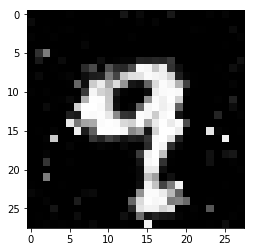

Number batches 78
92(0/78) D: 0.4261, G: 1.5978
92(1/78) D: 0.3430, G: 1.9521
92(2/78) D: 0.3889, G: 1.8919
92(3/78) D: 0.3476, G: 1.8273
92(4/78) D: 0.3779, G: 1.8493
92(5/78) D: 0.3417, G: 1.7003
92(6/78) D: 0.3450, G: 1.6515
92(7/78) D: 0.2892, G: 2.0738
92(8/78) D: 0.4346, G: 1.0434
92(9/78) D: 0.5739, G: 3.0702
92(10/78) D: 0.5956, G: 1.4025
92(11/78) D: 0.3752, G: 1.5478
92(12/78) D: 0.4248, G: 1.9751
92(13/78) D: 0.4247, G: 1.5446
92(14/78) D: 0.3679, G: 1.5591
92(15/78) D: 0.4368, G: 1.8675
92(16/78) D: 0.3915, G: 1.5917
92(17/78) D: 0.3007, G: 1.5745
92(18/78) D: 0.3579, G: 1.6928
92(19/78) D: 0.3700, G: 1.5962
92(20/78) D: 0.3593, G: 1.7514
92(21/78) D: 0.3524, G: 1.5528
92(22/78) D: 0.3976, G: 1.6460
92(23/78) D: 0.3669, G: 2.0275
92(24/78) D: 0.3454, G: 1.4129
92(25/78) D: 0.3945, G: 1.5904
92(26/78) D: 0.3821, G: 2.3377
92(27/78) D: 0.4083, G: 1.4976
92(28/78) D: 0.3987, G: 2.1152
92(29/78) D: 0.4025, G: 1.5229
92(30/78) D: 0.5242, G: 1.6859
92(31/78) D: 0.4279, G: 1.7684


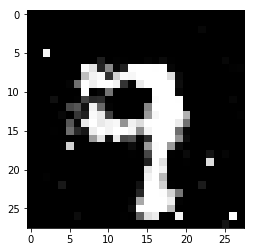

Number batches 78
93(0/78) D: 0.4221, G: 1.6297
93(1/78) D: 0.3698, G: 1.9909
93(2/78) D: 0.3779, G: 1.5506
93(3/78) D: 0.3583, G: 1.5467
93(4/78) D: 0.4243, G: 2.3115
93(5/78) D: 0.3827, G: 1.2529
93(6/78) D: 0.4555, G: 1.8630
93(7/78) D: 0.3584, G: 1.9950
93(8/78) D: 0.4246, G: 1.0695
93(9/78) D: 0.5682, G: 2.1203
93(10/78) D: 0.4782, G: 1.7256
93(11/78) D: 0.3947, G: 1.5835
93(12/78) D: 0.4318, G: 2.0537
93(13/78) D: 0.4029, G: 1.7873
93(14/78) D: 0.3666, G: 1.8032
93(15/78) D: 0.3625, G: 1.5838
93(16/78) D: 0.3631, G: 1.9024
93(17/78) D: 0.3074, G: 2.1086
93(18/78) D: 0.4396, G: 1.2771
93(19/78) D: 0.3401, G: 1.6724
93(20/78) D: 0.3957, G: 1.9013
93(21/78) D: 0.4016, G: 1.5529
93(22/78) D: 0.3958, G: 1.7106
93(23/78) D: 0.3871, G: 2.1467
93(24/78) D: 0.4554, G: 1.2709
93(25/78) D: 0.3896, G: 1.6682
93(26/78) D: 0.3670, G: 1.7645
93(27/78) D: 0.3596, G: 1.5877
93(28/78) D: 0.3192, G: 1.4938
93(29/78) D: 0.3843, G: 1.9250
93(30/78) D: 0.4292, G: 1.4739
93(31/78) D: 0.3968, G: 1.7330


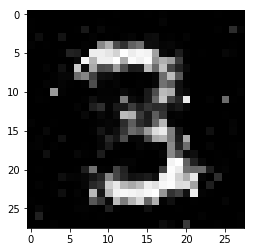

Number batches 78
94(0/78) D: 0.5046, G: 1.1742
94(1/78) D: 0.4738, G: 2.0733
94(2/78) D: 0.4245, G: 1.7036
94(3/78) D: 0.4178, G: 1.6605
94(4/78) D: 0.4010, G: 1.4582
94(5/78) D: 0.4230, G: 1.8910
94(6/78) D: 0.3911, G: 1.5814
94(7/78) D: 0.3959, G: 1.9172
94(8/78) D: 0.4549, G: 1.2129
94(9/78) D: 0.4651, G: 1.8242
94(10/78) D: 0.4274, G: 1.2380
94(11/78) D: 0.3782, G: 1.7610
94(12/78) D: 0.3893, G: 1.7254
94(13/78) D: 0.3981, G: 1.7422
94(14/78) D: 0.3611, G: 2.0413
94(15/78) D: 0.3785, G: 1.4963
94(16/78) D: 0.3921, G: 1.9677
94(17/78) D: 0.3055, G: 2.3646
94(18/78) D: 0.4540, G: 1.2444
94(19/78) D: 0.4107, G: 1.8526
94(20/78) D: 0.3503, G: 1.8189
94(21/78) D: 0.3823, G: 1.6340
94(22/78) D: 0.3488, G: 2.0466
94(23/78) D: 0.3511, G: 1.5123
94(24/78) D: 0.4078, G: 1.6883
94(25/78) D: 0.4011, G: 1.6315
94(26/78) D: 0.3586, G: 1.7667
94(27/78) D: 0.4408, G: 1.6915
94(28/78) D: 0.3511, G: 1.8171
94(29/78) D: 0.4062, G: 1.7800
94(30/78) D: 0.4349, G: 1.4401
94(31/78) D: 0.3843, G: 1.8747


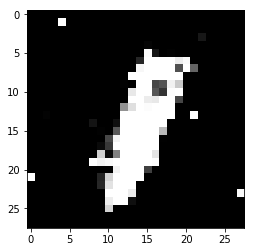

Number batches 78
95(0/78) D: 0.4847, G: 1.8212
95(1/78) D: 0.4259, G: 1.2928
95(2/78) D: 0.4151, G: 1.9790
95(3/78) D: 0.4307, G: 1.6490
95(4/78) D: 0.3734, G: 1.4407
95(5/78) D: 0.3738, G: 2.0553
95(6/78) D: 0.4536, G: 1.6365
95(7/78) D: 0.3753, G: 1.4694
95(8/78) D: 0.4170, G: 1.0950
95(9/78) D: 0.5149, G: 2.3932
95(10/78) D: 0.5268, G: 1.3005
95(11/78) D: 0.3908, G: 1.6955
95(12/78) D: 0.3772, G: 1.8824
95(13/78) D: 0.3571, G: 1.7193
95(14/78) D: 0.3693, G: 1.4631
95(15/78) D: 0.3914, G: 2.0375
95(16/78) D: 0.3537, G: 1.8255
95(17/78) D: 0.3296, G: 1.9623
95(18/78) D: 0.4336, G: 1.6718
95(19/78) D: 0.4091, G: 1.5771
95(20/78) D: 0.3982, G: 2.1348
95(21/78) D: 0.4305, G: 1.4803
95(22/78) D: 0.3921, G: 1.7887
95(23/78) D: 0.3545, G: 2.0400
95(24/78) D: 0.3936, G: 1.6053
95(25/78) D: 0.3732, G: 1.5157
95(26/78) D: 0.3861, G: 2.4243
95(27/78) D: 0.3912, G: 1.5779
95(28/78) D: 0.3583, G: 2.1887
95(29/78) D: 0.4405, G: 1.3642
95(30/78) D: 0.4408, G: 2.1345
95(31/78) D: 0.4026, G: 1.5412


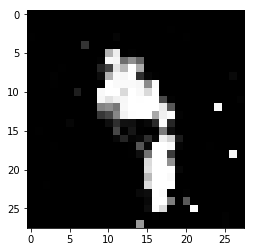

Number batches 78
96(0/78) D: 0.3773, G: 1.6258
96(1/78) D: 0.4233, G: 1.9411
96(2/78) D: 0.3629, G: 1.6721
96(3/78) D: 0.3806, G: 1.6990
96(4/78) D: 0.3092, G: 1.7979
96(5/78) D: 0.3743, G: 2.0115
96(6/78) D: 0.3704, G: 1.3402
96(7/78) D: 0.4609, G: 2.5211
96(8/78) D: 0.6081, G: 1.1249
96(9/78) D: 0.5152, G: 1.7689
96(10/78) D: 0.3732, G: 1.8139
96(11/78) D: 0.3165, G: 1.8458
96(12/78) D: 0.3358, G: 1.5174
96(13/78) D: 0.4118, G: 1.5871
96(14/78) D: 0.3858, G: 1.7807
96(15/78) D: 0.3848, G: 1.6386
96(16/78) D: 0.3236, G: 1.9021
96(17/78) D: 0.3319, G: 2.2253
96(18/78) D: 0.4010, G: 1.3049
96(19/78) D: 0.4050, G: 1.6996
96(20/78) D: 0.3785, G: 1.7677
96(21/78) D: 0.4068, G: 1.6297
96(22/78) D: 0.3785, G: 1.8217
96(23/78) D: 0.3861, G: 1.8973
96(24/78) D: 0.3835, G: 1.6045
96(25/78) D: 0.3984, G: 1.6858
96(26/78) D: 0.4363, G: 2.1390
96(27/78) D: 0.3813, G: 1.6000
96(28/78) D: 0.3720, G: 2.0978
96(29/78) D: 0.4052, G: 1.4307
96(30/78) D: 0.4384, G: 1.7928
96(31/78) D: 0.4106, G: 1.5461


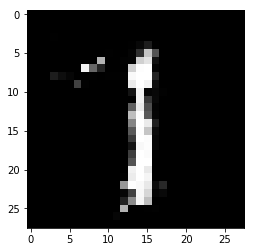

Number batches 78
97(0/78) D: 0.4478, G: 1.6458
97(1/78) D: 0.3982, G: 1.7549
97(2/78) D: 0.4324, G: 1.5757
97(3/78) D: 0.3990, G: 1.8940
97(4/78) D: 0.3835, G: 1.2795
97(5/78) D: 0.3993, G: 1.8903
97(6/78) D: 0.4045, G: 1.4646
97(7/78) D: 0.4032, G: 1.8273
97(8/78) D: 0.4304, G: 1.3267
97(9/78) D: 0.4288, G: 1.4305
97(10/78) D: 0.4113, G: 1.9580
97(11/78) D: 0.3613, G: 1.9152
97(12/78) D: 0.4121, G: 1.7038
97(13/78) D: 0.4062, G: 1.4646
97(14/78) D: 0.3837, G: 1.8758
97(15/78) D: 0.4248, G: 1.1760
97(16/78) D: 0.4712, G: 2.6396
97(17/78) D: 0.4479, G: 1.4012
97(18/78) D: 0.3818, G: 1.3927
97(19/78) D: 0.3782, G: 1.9299
97(20/78) D: 0.3543, G: 1.8275
97(21/78) D: 0.4361, G: 1.4400
97(22/78) D: 0.4188, G: 1.5680
97(23/78) D: 0.3572, G: 2.1412
97(24/78) D: 0.3779, G: 1.7383
97(25/78) D: 0.4157, G: 1.9017
97(26/78) D: 0.4059, G: 1.6183
97(27/78) D: 0.4238, G: 1.9891
97(28/78) D: 0.3595, G: 1.4676
97(29/78) D: 0.3412, G: 1.7452
97(30/78) D: 0.3773, G: 1.7539
97(31/78) D: 0.3729, G: 1.6660


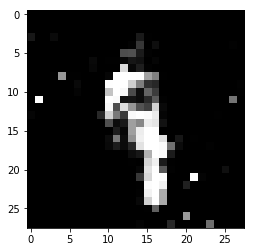

Number batches 78
98(0/78) D: 0.4082, G: 1.4064
98(1/78) D: 0.3754, G: 1.7953
98(2/78) D: 0.3538, G: 1.4799
98(3/78) D: 0.3262, G: 1.5833
98(4/78) D: 0.4240, G: 2.1518
98(5/78) D: 0.3601, G: 1.5987
98(6/78) D: 0.3587, G: 2.2733
98(7/78) D: 0.3943, G: 1.6923
98(8/78) D: 0.4608, G: 1.1754
98(9/78) D: 0.5406, G: 2.3777
98(10/78) D: 0.4721, G: 1.2244
98(11/78) D: 0.4079, G: 1.7644
98(12/78) D: 0.3898, G: 1.9002
98(13/78) D: 0.3764, G: 1.4787
98(14/78) D: 0.4247, G: 1.4489
98(15/78) D: 0.4217, G: 1.9472
98(16/78) D: 0.3520, G: 1.7920
98(17/78) D: 0.3752, G: 1.9785
98(18/78) D: 0.4079, G: 1.6251
98(19/78) D: 0.3646, G: 1.4317
98(20/78) D: 0.3663, G: 2.1713
98(21/78) D: 0.4770, G: 1.2877
98(22/78) D: 0.4643, G: 1.7132
98(23/78) D: 0.3522, G: 2.2199
98(24/78) D: 0.3924, G: 1.2639
98(25/78) D: 0.3978, G: 1.9280
98(26/78) D: 0.3606, G: 1.8721
98(27/78) D: 0.4291, G: 1.9345
98(28/78) D: 0.3181, G: 1.8209
98(29/78) D: 0.3810, G: 1.5168
98(30/78) D: 0.4390, G: 1.4316
98(31/78) D: 0.4597, G: 2.3246


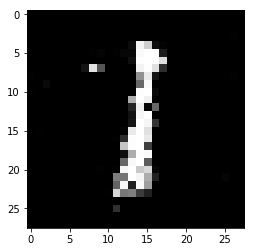

Number batches 78
99(0/78) D: 0.4649, G: 1.5674
99(1/78) D: 0.4045, G: 1.7681
99(2/78) D: 0.4346, G: 1.3745
99(3/78) D: 0.3660, G: 1.9449
99(4/78) D: 0.3650, G: 1.8082
99(5/78) D: 0.3797, G: 1.6008
99(6/78) D: 0.3485, G: 1.6596
99(7/78) D: 0.3478, G: 2.2720
99(8/78) D: 0.4048, G: 1.2552
99(9/78) D: 0.4284, G: 1.6747
99(10/78) D: 0.3796, G: 1.7069
99(11/78) D: 0.3910, G: 1.6829
99(12/78) D: 0.3785, G: 2.0837
99(13/78) D: 0.4301, G: 1.5776
99(14/78) D: 0.4256, G: 1.8365
99(15/78) D: 0.4129, G: 1.5444
99(16/78) D: 0.3776, G: 1.9825
99(17/78) D: 0.3279, G: 2.1780
99(18/78) D: 0.3840, G: 1.6128
99(19/78) D: 0.3973, G: 1.8520
99(20/78) D: 0.3368, G: 1.7776
99(21/78) D: 0.3883, G: 1.4969
99(22/78) D: 0.3590, G: 1.5861
99(23/78) D: 0.3691, G: 2.3157
99(24/78) D: 0.4033, G: 1.2190
99(25/78) D: 0.3888, G: 1.5429
99(26/78) D: 0.3905, G: 2.4412
99(27/78) D: 0.4215, G: 1.7277
99(28/78) D: 0.3971, G: 1.6118
99(29/78) D: 0.4182, G: 2.3740
99(30/78) D: 0.4731, G: 1.4557
99(31/78) D: 0.3917, G: 1.7285


In [13]:
batch_size = 128

for epoch in range(100):
    print('Epoch #%d' % epoch)
    
    # Generate an image and display it.
    disp_sample(g)
    
    num_batches = int(x_train.shape[0] / batch_size)
    print('Number batches %i' % num_batches)
    for i in range(num_batches):
        noise = np.random.uniform(-1, 1, size=(batch_size, 100))
        
        # Generate images from the noise using the generator.
        generated_images = g.predict(noise, verbose=0)
        
        # Grab the image batch for this iteration. 
        real_images = x_train[i * batch_size: (i+1) * batch_size]
        
        # Train the discriminator using the generated images and the real images.
        X = np.concatenate((real_images, generated_images))
        y = [1] * batch_size + [0] * batch_size
        d.trainable = True
        d_loss = d.train_on_batch(X, y)
        
        d.trainable = False
        
        # Generate more noise
        noise = np.random.uniform(-1, 1, (batch_size, 100))
        
        # Get the g_loss
        g_loss = dg.train_on_batch(noise, [1] * batch_size)
        
        print('%i(%i/%i) D: %.4f, G: %.4f' % (epoch, i, num_batches, d_loss, g_loss))
        